In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import urllib

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()  

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahabziari","key":"5901cffd98e3fce7636781e4b883dad9"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 73.5MB/s]


In [ ]:
!unzip '/content/new-york-city-airbnb-open-data.zip' -d '/content/'

Archive:  /content/new-york-city-airbnb-open-data.zip
  inflating: /content/AB_NYC_2019.csv  
  inflating: /content/New_York_City_.png  


In [ ]:
data = pd.read_csv('/content/AB_NYC_2019.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# **Cleaning**

In [ ]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
len(data)

48895

In [ ]:
for col in data.columns :
  if data[col].dtype == 'int64' or data[col].dtype == 'float64':
    if col !='latitude' and col != 'longitude':
      highest = data[col].mean() + 3*data[col].std()
      lowest = data[col].mean() - 3*data[col].std()
      temp = (data[col] > highest ) | (data[col] < lowest )
      data = data.drop(data[temp].index)

In [ ]:
len(data)

45743

In [ ]:
data = data[data['price']>0]
len(data)

45732

In [ ]:
data.drop(['name','host_name','id'], axis=1, inplace=True)
data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
data.isna().sum()

host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9318
reviews_per_month                 9318
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
for col in data.columns :
  if data[col].dtype == 'object' or data[col].dtype == 'bool':
    data[col] = data[col].fillna(data[col].value_counts().head(1).index[0])
data.fillna(data._get_numeric_data().mean(),inplace=True)
data.isna().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# **Learn From Area**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


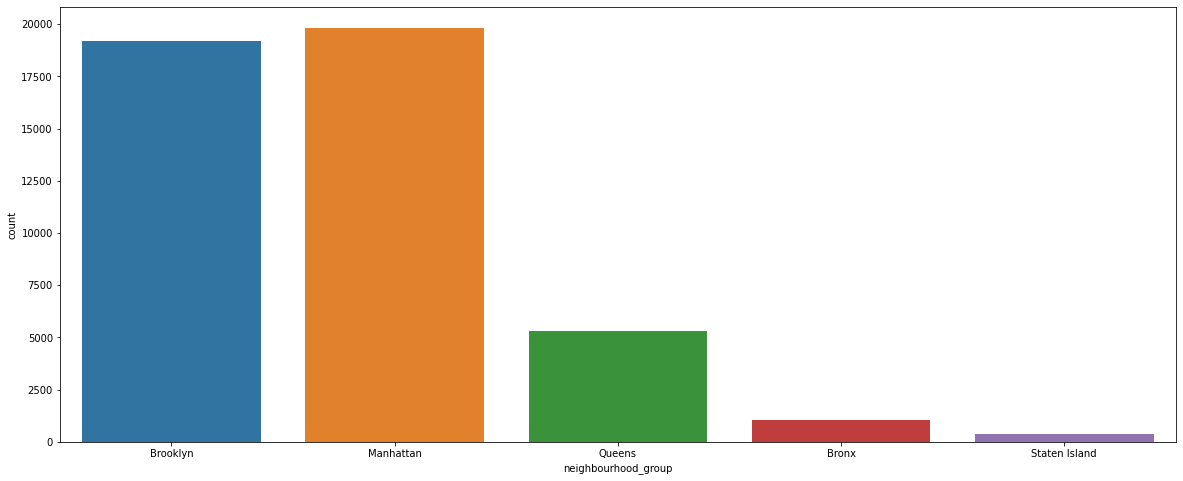

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot(data['neighbourhood_group'])

## **Price**

**Disturbiution of prices in diffrent neighbourhood_group**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

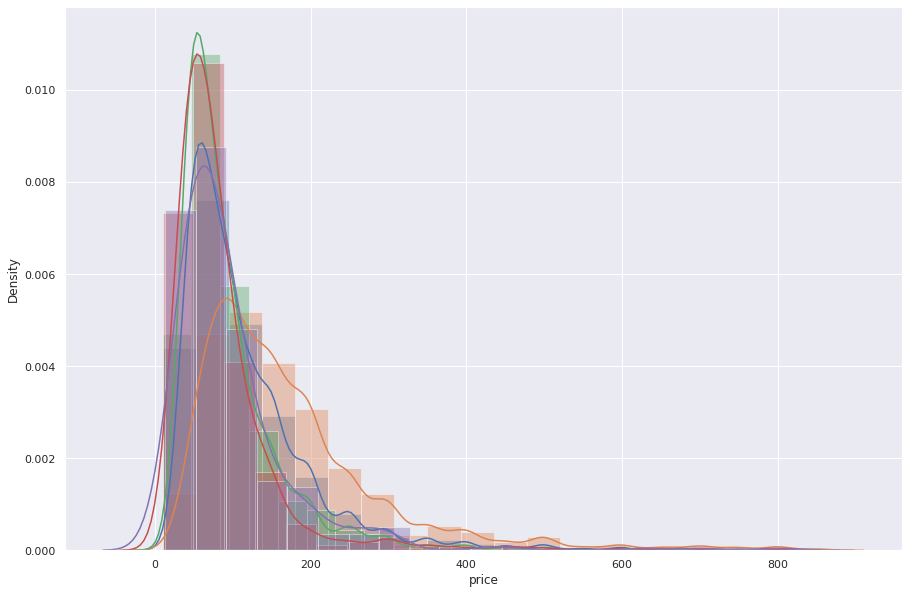

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
for groups in data.neighbourhood_group.unique():
    sns.distplot(data.price[data['neighbourhood_group']==groups],kde_kws={"label": groups}, bins=20)

### **All neighbourhoods**

In [ ]:
from scipy.stats import f_oneway
f_oneway(*[data.price[data.neighbourhood_group == i]
for i in data.neighbourhood_group.unique()])

F_onewayResult(statistic=1090.4941950085395, pvalue=0.0)

In [ ]:
data[["neighbourhood_group",'price']].groupby("neighbourhood_group").describe()

price                                             \
                       count        mean         std   min   25%    50%   
neighbourhood_group                                                       
Bronx                 1033.0   85.302033   74.128762  10.0  45.0   65.0   
Brooklyn             19212.0  116.764418   89.171065  10.0  60.0   90.0   
Manhattan            19829.0  172.754904  121.766788  10.0  92.0  145.0   
Queens                5304.0   94.949284   70.214812  10.0  50.0   75.0   
Staten Island          354.0   97.225989   85.473153  13.0  50.0   75.0   

                                    
                        75%    max  
neighbourhood_group                 
Bronx                100.00  800.0  
Brooklyn             150.00  860.0  
Manhattan            200.00  860.0  
Queens               111.25  750.0  
Staten Island        109.75  800.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


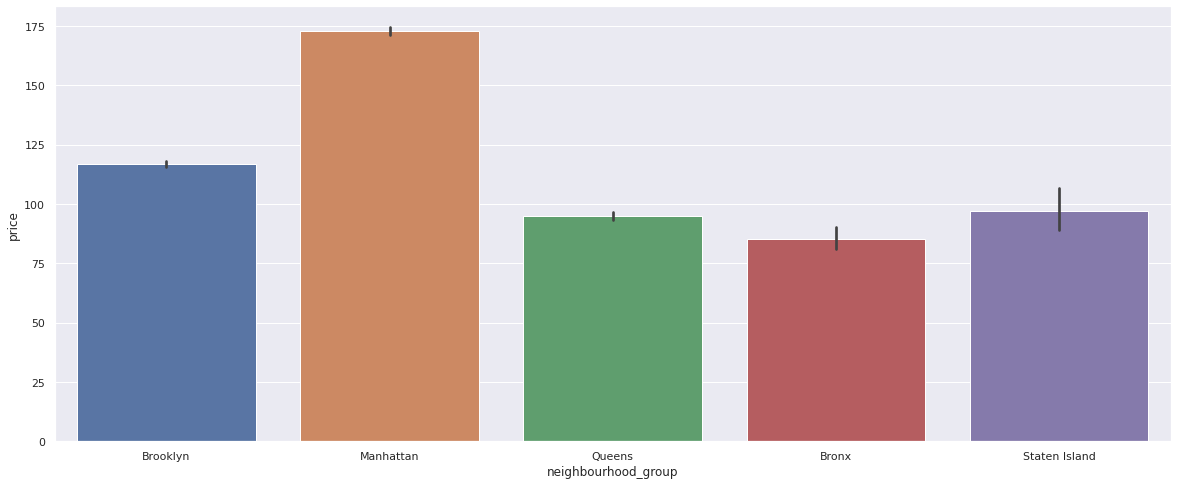

In [ ]:
plt.figure(figsize=(20,8))

sns.barplot('neighbourhood_group' ,'price' , data = data)

### **staten island & Brooklyn**

In [ ]:
temp = data.neighbourhood_group == "Staten Island"
temp2 = data.neighbourhood_group == "Brooklyn"
price1 = data[temp2]["price"].values
price2 = data[temp2]["price"].values[1200:1573]

In [ ]:
stats.ttest_ind(price2,price1)

Ttest_indResult(statistic=3.0221896027282282, pvalue=0.0025127756872674314)

## **Number Of Reviews**

### **All neighbourhoods**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

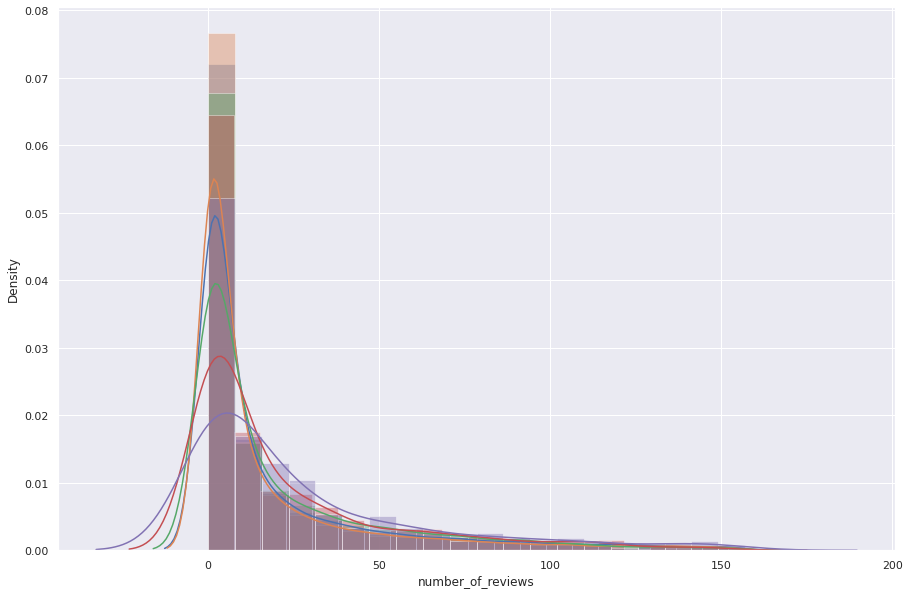

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
for groups in data.neighbourhood_group.unique():
    sns.distplot(data.number_of_reviews[data['neighbourhood_group']==groups],kde_kws={"label": groups}, bins=20)

In [ ]:
from scipy.stats import f_oneway
f_oneway(*[data.number_of_reviews[data.neighbourhood_group == i]
for i in data.neighbourhood_group.unique()])

F_onewayResult(statistic=30.39261515769849, pvalue=2.6674117247089945e-25)

In [ ]:
data[["neighbourhood_group",'number_of_reviews']].groupby("neighbourhood_group").describe()

number_of_reviews                                        \
                                count       mean        std  min  25%   50%   
neighbourhood_group                                                           
Bronx                          1033.0  21.706680  30.772202  0.0  1.0   8.0   
Brooklyn                      19212.0  18.889236  30.350659  0.0  1.0   5.0   
Manhattan                     19829.0  16.719250  28.733204  0.0  1.0   4.0   
Queens                         5304.0  19.941365  29.654287  0.0  1.0   6.0   
Staten Island                   354.0  26.661017  35.243118  0.0  1.0  11.0   

                                  
                      75%    max  
neighbourhood_group               
Bronx                30.0  152.0  
Brooklyn             22.0  157.0  
Manhattan            18.0  157.0  
Queens               27.0  157.0  
Staten Island        37.0  157.0

**Samples from each group**

In [ ]:
temp1 = data.neighbourhood_group == "Staten Island"
temp = data[temp1]
staten = temp.sample(n=300)

temp2 = data.neighbourhood_group == "Manhattan"
temp = data[temp2]
manhattan = temp.sample(n=300)

temp3 = data.neighbourhood_group == "Brooklyn"
temp = data[temp3]
brooklyn = temp.sample(n=300)

temp4 = data.neighbourhood_group == "Queens"
temp = data[temp4]
queens = temp.sample(n=300)

temp5 = data.neighbourhood_group == "Bronx"
temp = data[temp5]
bronx = temp.sample(n=300)

samp = pd.concat([staten, manhattan, brooklyn, queens, bronx])

f_oneway(*[samp.number_of_reviews[samp.neighbourhood_group == i]
for i in samp.neighbourhood_group.unique()])

F_onewayResult(statistic=5.394099871385132, pvalue=0.00025941077520524045)

In [ ]:
samp[["neighbourhood_group",'number_of_reviews']].groupby("neighbourhood_group").describe()

number_of_reviews                                        \
                                count       mean        std  min  25%   50%   
neighbourhood_group                                                           
Bronx                           300.0  22.710000  32.113082  0.0  1.0   8.0   
Brooklyn                        300.0  16.226667  27.658125  0.0  1.0   4.0   
Manhattan                       300.0  17.473333  28.571964  0.0  1.0   4.0   
Queens                          300.0  20.706667  28.456514  0.0  1.0   8.0   
Staten Island                   300.0  26.330000  34.307693  0.0  1.0  12.0   

                                   
                       75%    max  
neighbourhood_group                
Bronx                31.25  152.0  
Brooklyn             18.00  145.0  
Manhattan            22.25  144.0  
Queens               31.00  153.0  
Staten Island        37.00  157.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


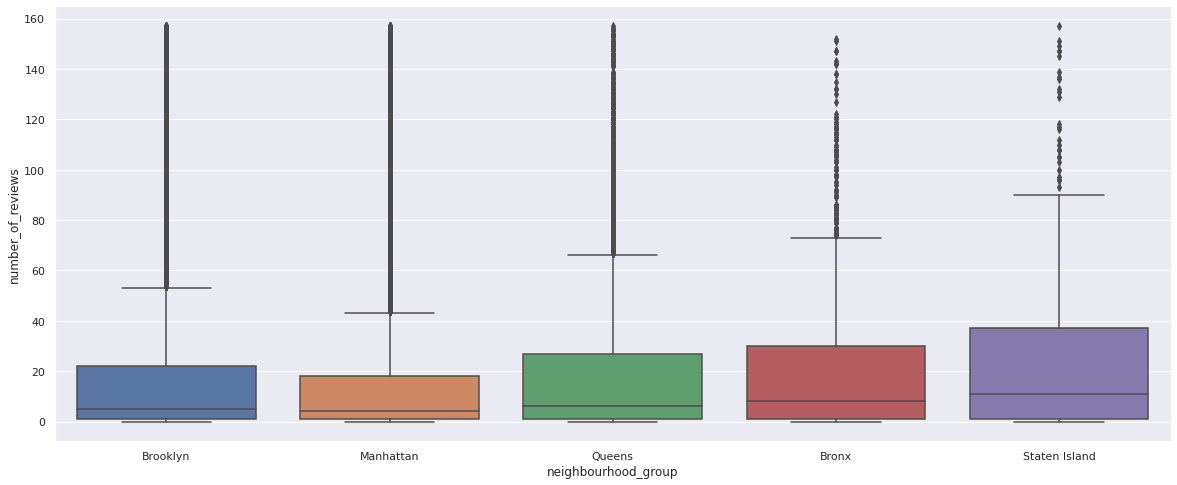

In [ ]:
plt.figure(figsize=(20,8))

sns.boxplot('neighbourhood_group' ,'number_of_reviews' , data = data)

### **Staten Island**

In [ ]:
stats.ttest_ind(staten.price,data.sample(373).price)

Ttest_indResult(statistic=-4.236263369330359, pvalue=2.5903794712628508e-05)

### **Zero Reviews**

In [ ]:
temp = data.number_of_reviews == 0
data_zero = data[temp]
data_zero

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.1804,1,365
19,17985,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,2019-06-23,1.1804,2,249
26,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,2019-06-23,1.1804,1,0
36,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,2019-06-23,1.1804,1,365
38,45445,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,2019-06-23,1.1804,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.1804,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.1804,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.1804,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.1804,6,2


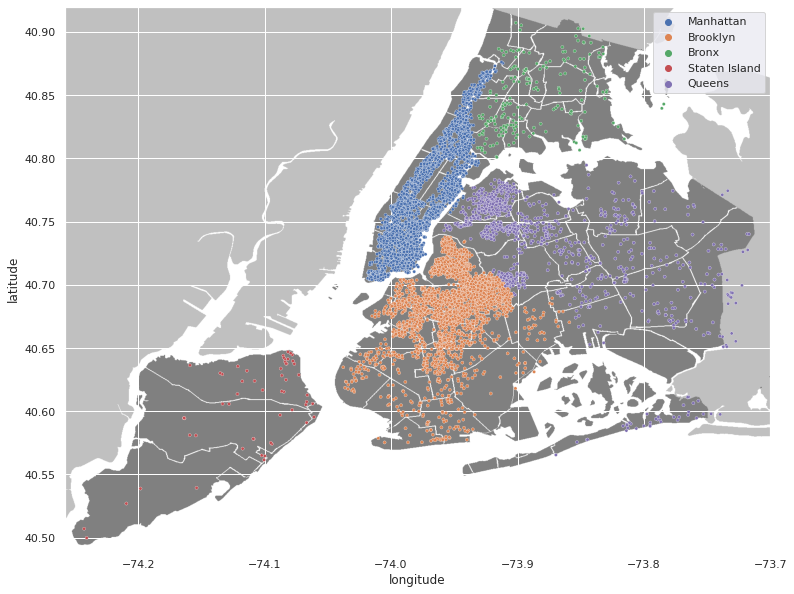

In [ ]:
plt.figure(figsize=(20,10))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data_zero['longitude'], y=data_zero['latitude'], hue='neighbourhood_group',s=10, data=data_zero)
plt.legend()
plt.show()

### **High Reviews**

In [ ]:
temp = data.number_of_reviews > 150
data_high = data[temp]
data_high

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
129,126607,Manhattan,Harlem,40.81618,-73.94894,Entire home/apt,120,3,155,2019-06-20,1.42,3,213
152,142684,Brooklyn,Williamsburg,40.71536,-73.96057,Private room,125,3,155,2019-06-13,1.61,1,1
192,9744,Brooklyn,South Slope,40.66930,-73.98804,Entire home/apt,135,5,151,2019-06-22,1.43,3,162
344,327900,Manhattan,Lower East Side,40.71965,-73.98766,Entire home/apt,150,2,151,2019-06-24,1.51,2,52
572,1112560,Brooklyn,Bedford-Stuyvesant,40.68741,-73.95741,Private room,79,3,152,2019-06-25,1.60,3,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21292,2788934,Brooklyn,Greenpoint,40.72155,-73.94414,Private room,59,2,155,2019-06-30,5.20,2,60
21396,15625009,Manhattan,Upper West Side,40.78461,-73.97627,Entire home/apt,165,1,152,2019-07-06,5.32,1,228
21412,69366752,Queens,Forest Hills,40.73576,-73.85434,Entire home/apt,95,2,153,2019-07-01,5.31,2,106
21817,27624941,Manhattan,Upper East Side,40.78025,-73.94802,Private room,99,2,154,2019-07-01,5.42,1,145


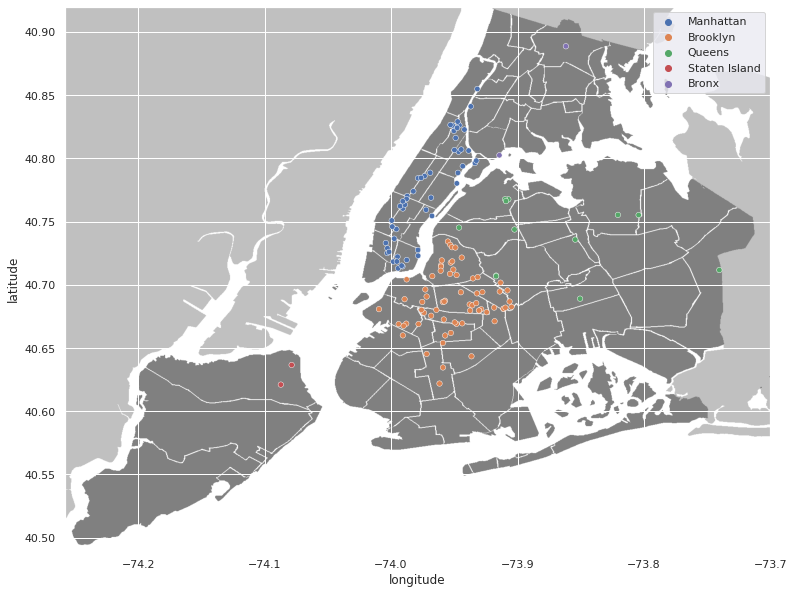

In [ ]:
plt.figure(figsize=(20,10))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data_high['longitude'], y=data_high['latitude'], hue='neighbourhood_group',s=30, data=data_high)
plt.legend()
plt.show()

In [ ]:
data_high[["neighbourhood",'number_of_reviews']].groupby("neighbourhood").describe()

number_of_reviews                               \
                                      count        mean       std    min   
neighbourhood                                                              
Astoria                                 3.0  153.666667  2.516611  151.0   
Bedford-Stuyvesant                     17.0  152.882353  1.691240  151.0   
Boerum Hill                             1.0  151.000000       NaN  151.0   
Bushwick                                6.0  155.166667  1.940790  152.0   
Chelsea                                 3.0  152.333333  1.154701  151.0   
Chinatown                               4.0  152.500000  1.290994  151.0   
Crown Heights                           5.0  153.200000  1.483240  151.0   
DUMBO                                   1.0  152.000000       NaN  152.0   
East Flatbush                           1.0  157.000000       NaN  157.0   
East Harlem                             5.0  152.200000  1.643168  151.0   
East Village                            2.0  156.500000  0.707107  156.0   
Flatbush                                2.0  153.500000  3.535534  151.0   
Flushing                                2.0  152.500000  2.121320  151.0   
Forest Hills                            1.0  153.000000       NaN  153.0   
Fort Greene                             3.0  153.333333  1.154701  152.0   
Gowanus                                 1.0  155.000000       NaN  155.0   
Greenpoint                              5.0  153.400000  1.341641  152.0   
Harlem                                 11.0  153.363636  2.248232  151.0   
Hell's Kitchen                          5.0  154.200000  1.923538  152.0   
Kensington                              1.0  154.000000       NaN  154.0   
Little Italy                            1.0  155.000000       NaN  155.0   
Long Island City                        1.0  153.000000       NaN  153.0   
Lower East Side                         1.0  151.000000       NaN  151.0   
Midtown                                 2.0  154.000000  2.828427  152.0   
Midwood                                 1.0  157.000000       NaN  157.0   
Nolita                                  1.0  156.000000       NaN  156.0   
Park Slope                              3.0  152.666667  1.527525  151.0   
Port Morris                             1.0  152.000000       NaN  152.0   
Prospect Heights                        2.0  155.000000  1.414214  154.0   
Prospect-Lefferts Gardens               2.0  153.000000  2.828427  151.0   
Queens Village                          1.0  152.000000       NaN  152.0   
Red Hook                                1.0  157.000000       NaN  157.0   
Ridgewood                               2.0  155.000000  2.828427  153.0   
SoHo                                    2.0  152.000000  0.000000  152.0   
South Slope                             2.0  151.500000  0.707107  151.0   
Sunset Park                             1.0  152.000000       NaN  152.0   
Tompkinsville                           2.0  154.000000  4.242641  151.0   
Upper East Side                         2.0  152.500000  2.121320  151.0   
Upper West Side                         6.0  154.666667  2.065591  152.0   
Wakefield                               1.0  151.000000       NaN  151.0   
Washington Heights                      2.0  156.000000  1.414214  155.0   
West Village                            3.0  155.666667  2.309401  153.0   
Williamsburg                           12.0  154.583333  2.020726  151.0   
Woodhaven                               1.0  155.000000       NaN  155.0   
Woodside                                1.0  156.000000       NaN  156.0   

                                                         
                              25%    50%     75%    max  
neighbourhood                                            
Astoria                    152.50  154.0  155.00  156.0  
Bedford-Stuyvesant         152.00  153.0  153.00  156.0  
Boerum Hill                151.00  151.0  151.00  151.0  
Bushwick                   15

In [ ]:
temp = data.neighbourhood == "Bedford-Stuyvesant"
data_E = data[temp]
data_E

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.4000,1,0
24,25183,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,Entire home/apt,120,2,88,2019-06-19,0.7300,2,233
34,35935,Brooklyn,Bedford-Stuyvesant,40.68310,-73.95473,Private room,70,1,74,2019-05-12,0.6600,2,269
36,7355,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,2019-06-23,1.1804,1,365
47,50148,Brooklyn,Bedford-Stuyvesant,40.68111,-73.95591,Entire home/apt,110,7,61,2019-05-25,0.5200,1,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,154095549,Brooklyn,Bedford-Stuyvesant,40.69195,-73.94225,Private room,47,2,0,2019-06-23,1.1804,2,48
48843,53966115,Brooklyn,Bedford-Stuyvesant,40.69635,-73.93743,Private room,45,29,0,2019-06-23,1.1804,2,341
48856,66993395,Brooklyn,Bedford-Stuyvesant,40.68886,-73.92879,Entire home/apt,345,4,0,2019-06-23,1.1804,3,354
48869,1550580,Brooklyn,Bedford-Stuyvesant,40.68759,-73.95705,Private room,45,4,0,2019-06-23,1.1804,1,7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


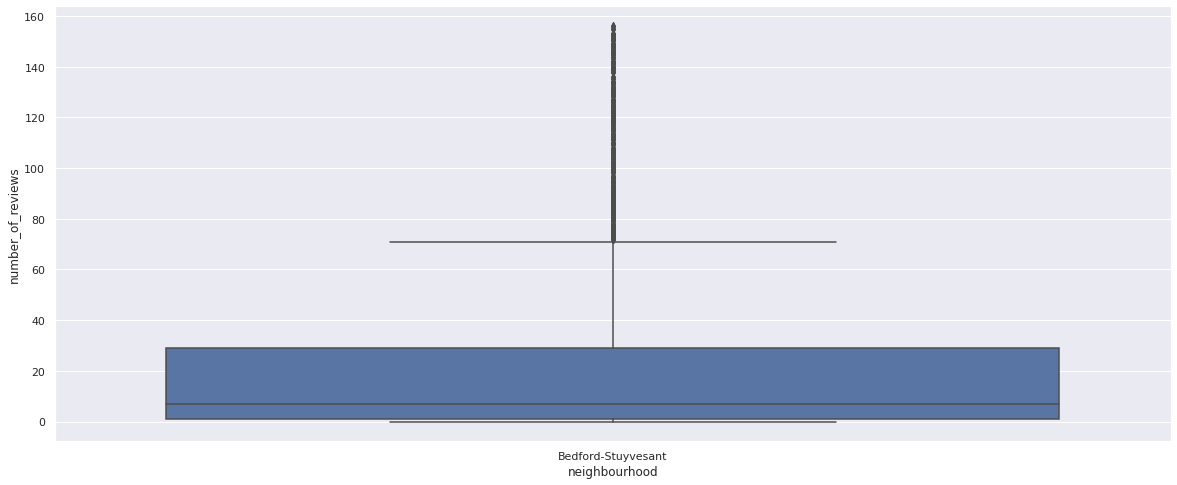

In [ ]:
plt.figure(figsize=(20,8))

sns.boxplot('neighbourhood' , 'number_of_reviews' , data = data_E)

In [ ]:
stats.ttest_ind(data_E.number_of_reviews,data.sample(3516).number_of_reviews)

Ttest_indResult(statistic=6.231825110838626, pvalue=4.876658955136984e-10)

# **Log Transform**

In [ ]:
data['price_log']=np.log(data['price'])
data

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.2100,6,365,5.003946
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.3800,2,355,5.416100
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.1804,1,365,5.010635
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1000,1,0,4.382027
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.5900,1,129,5.298317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.1804,2,9,4.248495
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.1804,2,36,3.688879
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.1804,1,27,4.744932
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.1804,6,2,4.007333


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


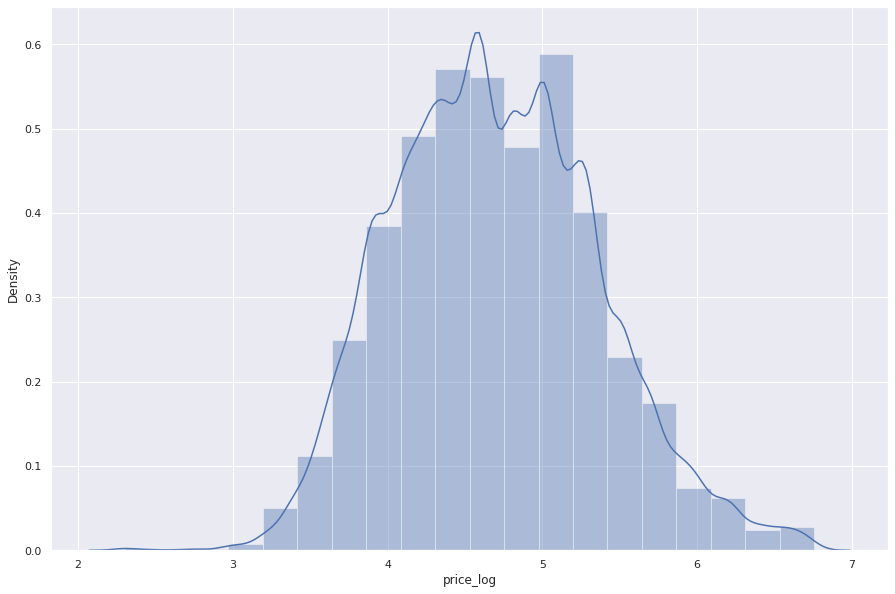

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(data.price_log, bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

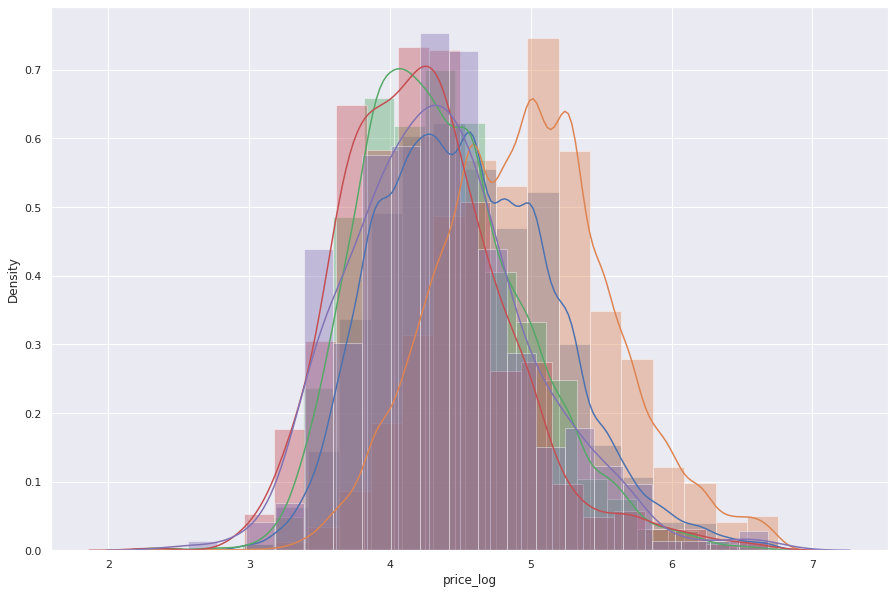

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
for groups in data.neighbourhood_group.unique():
    sns.distplot(data.price_log[data['neighbourhood_group']==groups],kde_kws={"label": groups}, bins=20)

# **Busyiest**

### **First Things**

In [ ]:
data_busy = data.copy()
data_busy['available'] = 1
data_busy

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log,available
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.2100,6,365,5.003946,1
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.3800,2,355,5.416100,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.1804,1,365,5.010635,1
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1000,1,0,4.382027,1
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.5900,1,129,5.298317,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.1804,2,9,4.248495,1
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.1804,2,36,3.688879,1
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.1804,1,27,4.744932,1
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.1804,6,2,4.007333,1


In [ ]:
for i in range(len(data_busy)):
    if data_busy.iloc[i, data_busy.columns.get_loc('availability_365')] == 0:
        data_busy.iloc[i, data_busy.columns.get_loc('available')] = 0
data_busy

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log,available
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.2100,6,365,5.003946,1
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.3800,2,355,5.416100,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.1804,1,365,5.010635,1
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1000,1,0,4.382027,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.5900,1,129,5.298317,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.1804,2,9,4.248495,1
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.1804,2,36,3.688879,1
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.1804,1,27,4.744932,1
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.1804,6,2,4.007333,1


In [ ]:
temp = data_busy.availability_365 == 0
data_busyiest = data_busy[temp]
data_busyiest

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log,available
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1000,1,0,4.382027,0
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.4000,1,0,4.094345,0
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.9900,1,0,4.369448,0
20,21207,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.0700,1,0,5.700444,0
26,26394,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,2019-06-23,1.1804,1,0,4.382027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,16883913,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,2019-06-23,1.1804,1,0,3.806662,0
48731,121384174,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,2019-06-23,1.1804,1,0,4.709530,0
48756,273824202,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,2019-06-23,1.1804,1,0,4.859812,0
48760,19990280,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,2019-06-23,1.1804,1,0,3.828641,0


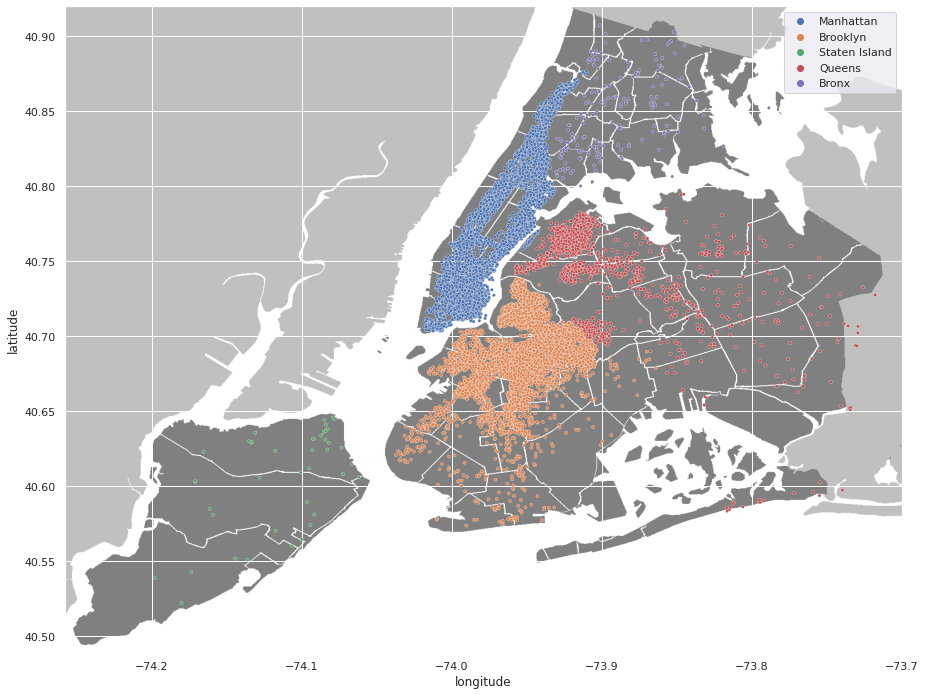

In [ ]:
plt.figure(figsize=(15,15))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data_busyiest['longitude'], y=data_busyiest['latitude'], hue='neighbourhood_group',s=10, data=data_busyiest)
plt.legend()
plt.show()

### **Price & log_price**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


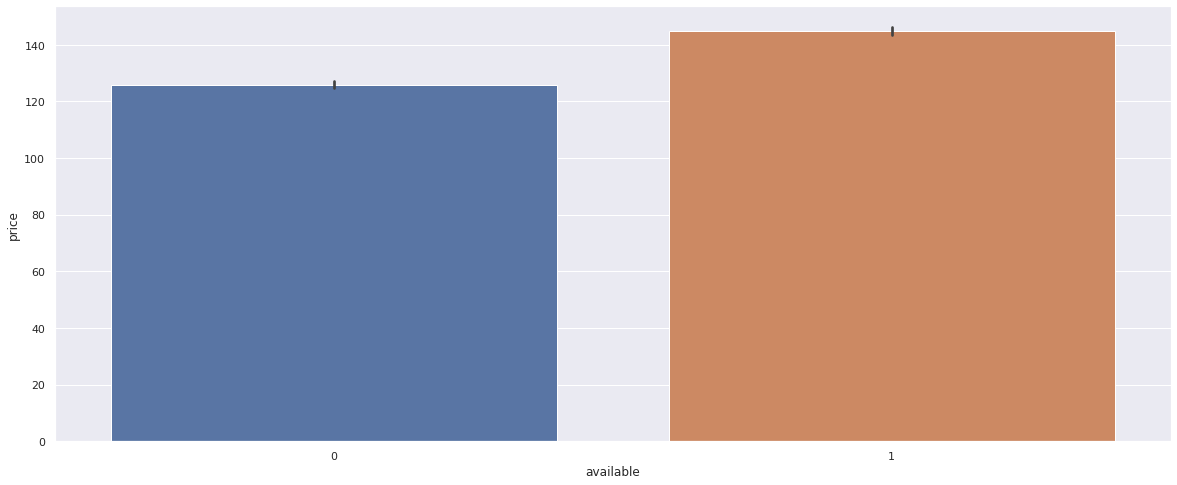

In [ ]:
plt.figure(figsize=(20,8))

sns.barplot('available' ,'price' , data = data_busy)

In [ ]:
stats.ttest_ind(data_busyiest.sample(1000).price,data.sample(1000).price)

Ttest_indResult(statistic=-1.9196255651575995, pvalue=0.055047475684328384)

In [ ]:
stats.wilcoxon(data_busyiest.sample(1000).price,data.sample(1000).price)

WilcoxonResult(statistic=211564.5, pvalue=0.0003214960572472731)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


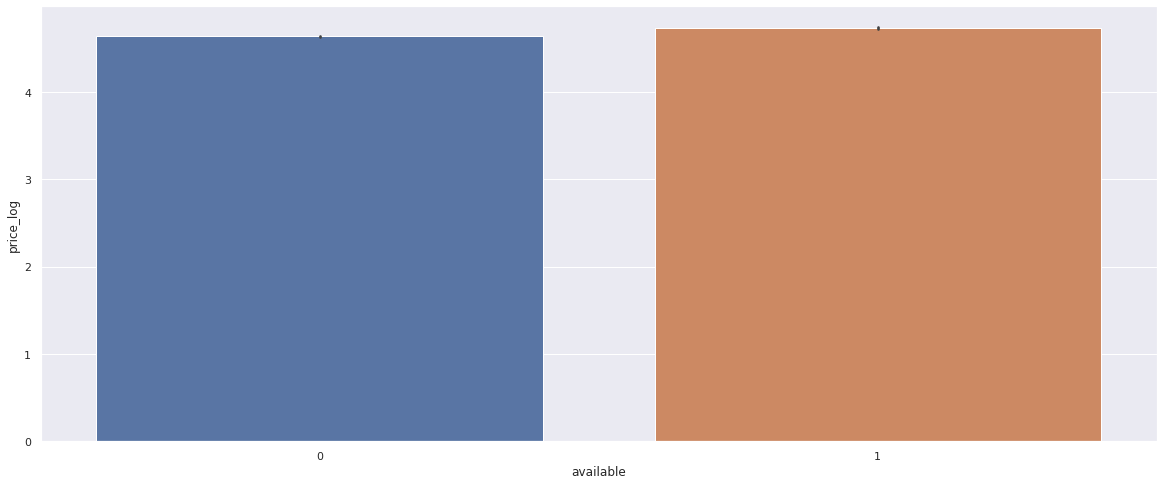

In [ ]:
plt.figure(figsize=(20,8))

sns.barplot('available' ,'price_log' , data = data_busy)

### **Some discovery**

In [ ]:
data_busyiest[['price','number_of_reviews','minimum_nights','calculated_host_listings_count']].describe()

,price,number_of_reviews,minimum_nights,calculated_host_listings_count
count,17294.000000,17294.000000,17294.000000,17294.000000
mean,125.958136,7.188678,4.164566,1.431132
std,90.576060,15.228659,5.915682,3.802332
min,10.000000,0.000000,1.000000,1.000000
25%,65.000000,0.000000,1.000000,1.000000
50%,100.000000,2.000000,2.000000,1.000000
75%,155.000000,7.000000,4.000000,1.000000
max,850.000000,157.000000,62.000000,103.000000


In [ ]:
data[['price','number_of_reviews','minimum_nights','calculated_host_listings_count']].describe()

,price,number_of_reviews,minimum_nights,calculated_host_listings_count
count,45732.000000,45732.000000,45732.000000,45732.000000
mean,137.649370,18.194175,5.799659,3.668066
std,107.353545,29.668059,8.727500,11.158911
min,10.000000,0.000000,1.000000,1.000000
25%,68.000000,1.000000,1.000000,1.000000
50%,104.000000,5.000000,3.000000,1.000000
75%,175.000000,21.000000,5.000000,2.000000
max,860.000000,157.000000,65.000000,103.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


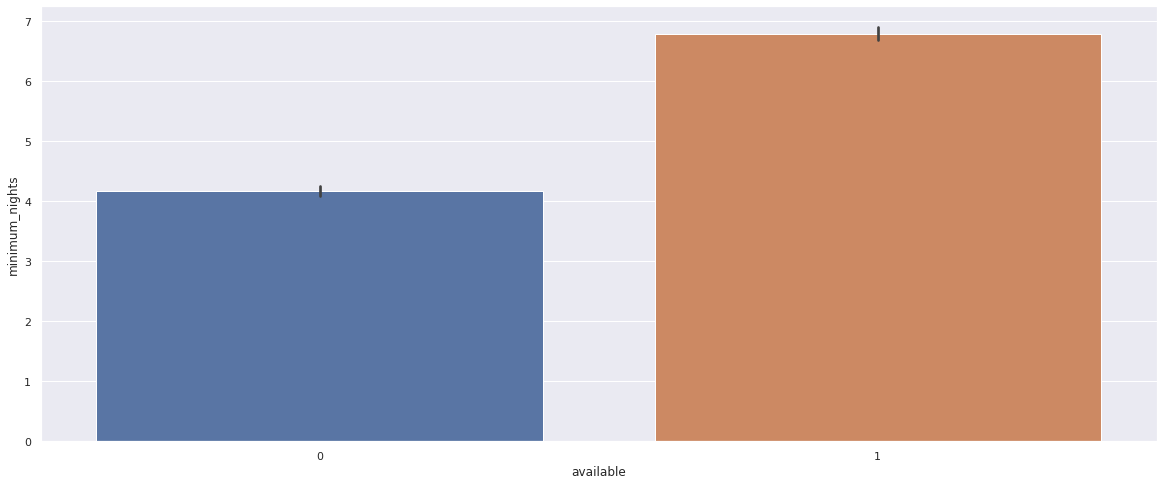

In [ ]:
plt.figure(figsize=(20,8))

sns.barplot('available' ,'minimum_nights' , data = data_busy)

In [ ]:
stats.ttest_ind(data_busyiest.sample(500).minimum_nights,data.sample(500).minimum_nights)

Ttest_indResult(statistic=-4.206058631887332, pvalue=2.8322828779348048e-05)

In [ ]:
stats.wilcoxon(data_busyiest.sample(500).minimum_nights,data.sample(500).minimum_nights)

WilcoxonResult(statistic=36232.0, pvalue=0.0027560906231689)

In [ ]:
stats.ttest_ind(data_busyiest.sample(500).calculated_host_listings_count,data.sample(500).calculated_host_listings_count)

Ttest_indResult(statistic=-5.126698494142745, pvalue=3.540354825958418e-07)

In [ ]:
stats.wilcoxon(data_busyiest.sample(500).calculated_host_listings_count,data.sample(500).calculated_host_listings_count)

WilcoxonResult(statistic=4599.0, pvalue=1.6827153570954893e-14)

### **Room Type**

In [ ]:
data_busyiest[["room_type",'price']].groupby("room_type").describe()

price                                                    \
                  count        mean        std   min    25%    50%    75%   
room_type                                                                   
Entire home/apt  8738.0  172.221561  95.849260  10.0  110.0  150.0  200.0   
Private room     8265.0   78.803872  51.383138  10.0   50.0   69.0   90.0   
Shared room       291.0   76.061856  82.669030  10.0   35.0   60.0   80.0   

                        
                   max  
room_type               
Entire home/apt  850.0  
Private room     800.0  
Shared room      800.0

In [ ]:
data[["room_type",'price']].groupby("room_type").describe()

price                                                     \
                   count        mean         std   min    25%    50%    75%   
room_type                                                                     
Entire home/apt  23417.0  189.930051  115.262730  10.0  120.0  159.0  225.0   
Private room     21198.0   83.642325   60.908738  10.0   50.0   70.0   95.0   
Shared room       1117.0   66.552372   72.263780  10.0   32.0   45.0   75.0   

                        
                   max  
room_type               
Entire home/apt  860.0  
Private room     848.0  
Shared room      800.0

# **Correlation Between all datas**

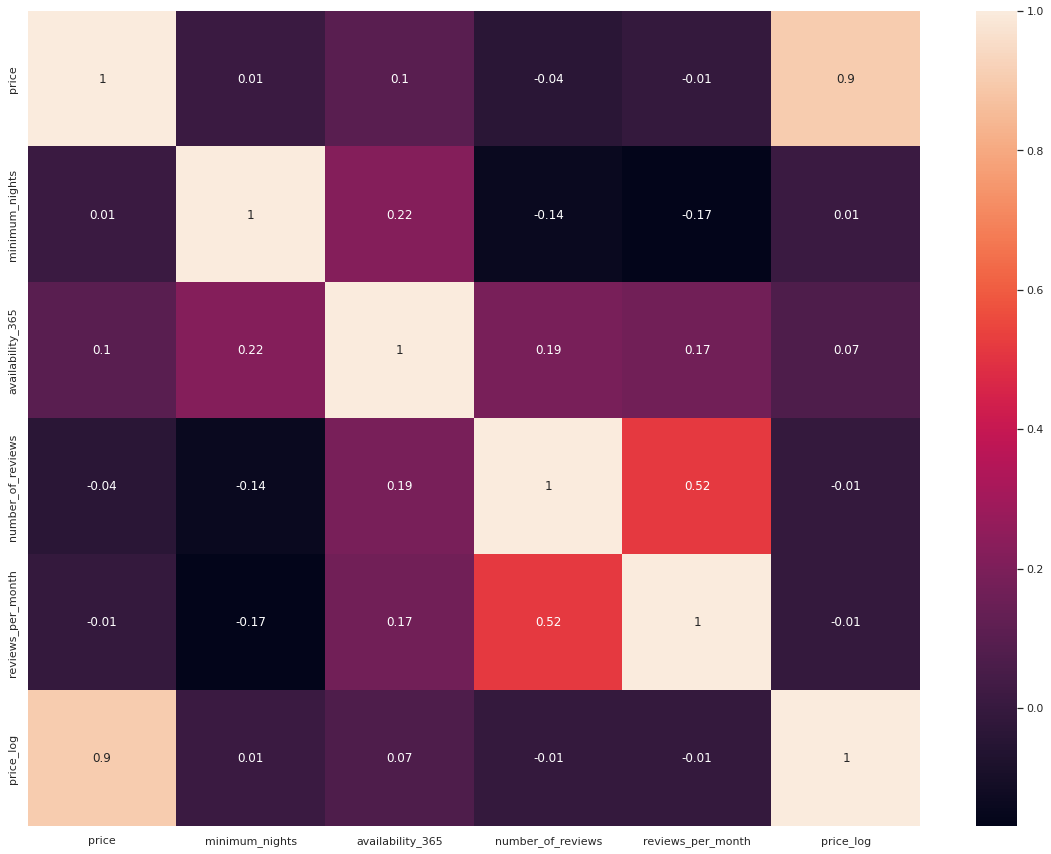

In [ ]:
plt.figure(figsize=(20,15))
correlation_matrix = data[["price","minimum_nights","availability_365","number_of_reviews","reviews_per_month",'price_log']].corr().round(2)
sns.heatmap(data=correlation_matrix  , annot=True)

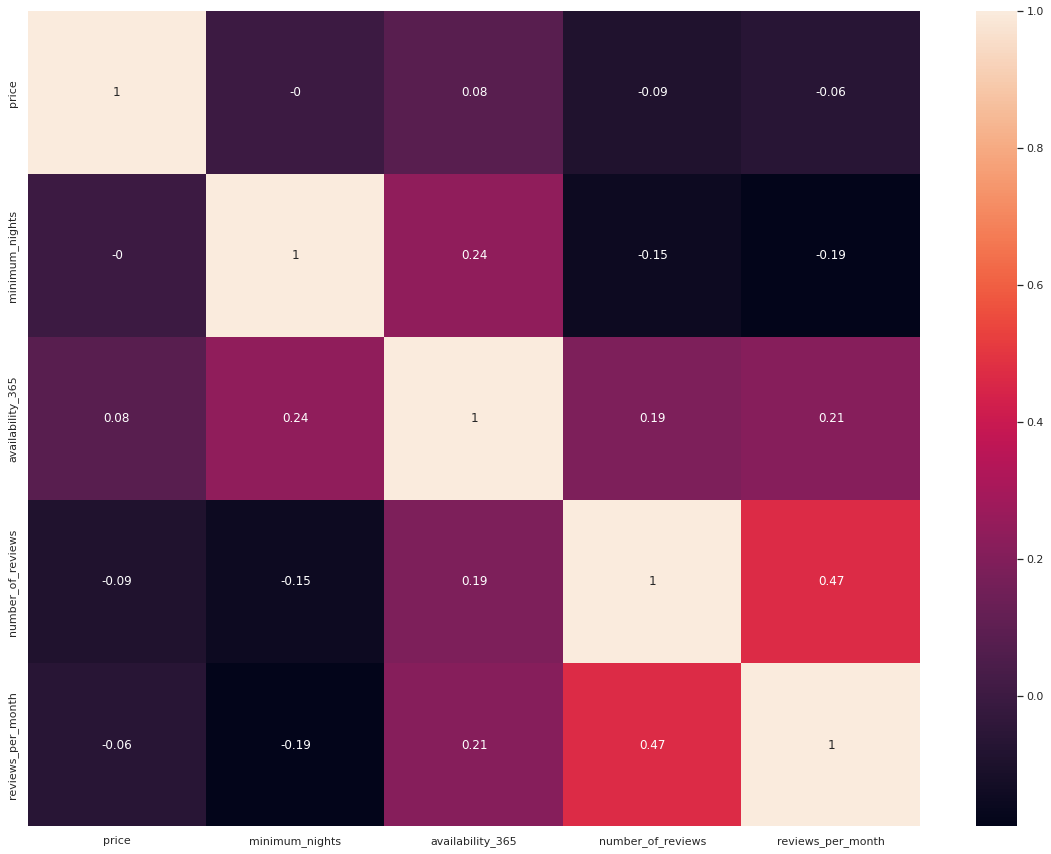

In [ ]:
data_samp = data.sample(600)
plt.figure(figsize=(20,15))
correlation_matrix = data_samp[["price","minimum_nights","availability_365","number_of_reviews","reviews_per_month"]].corr().round(2)
sns.heatmap(data=correlation_matrix , annot=True)

In [ ]:
data_chance = data.sample(100)
stats.spearmanr(data_chance.availability_365 , data_chance.number_of_reviews)

SpearmanrResult(correlation=0.3062419827264191, pvalue=0.0019435373425796855)

In [ ]:
stats.pearsonr(data_chance.availability_365 , data_chance.number_of_reviews)

(0.2093088363474179, 0.03661935126500605)

In [ ]:
data_temp = data.sample(400)

# **Availibiliy**

In [ ]:
data[['neighbourhood_group' , "availability_365"]].groupby("neighbourhood_group").describe()

availability_365                                     \
                               count        mean         std  min   25%   
neighbourhood_group                                                       
Bronx                         1033.0  163.643756  135.610002  0.0  35.0   
Brooklyn                     19212.0   96.985738  125.480726  0.0   0.0   
Manhattan                    19829.0  102.238086  129.239104  0.0   0.0   
Queens                        5304.0  141.320890  135.700161  0.0   0.0   
Staten Island                  354.0  195.855932  132.450361  0.0  73.0   

                                          
                       50%    75%    max  
neighbourhood_group                       
Bronx                145.0  313.0  365.0  
Brooklyn              22.0  179.0  365.0  
Manhattan             23.0  199.0  365.0  
Queens                90.0  282.0  365.0  
Staten Island        199.0  326.0  365.0

In [ ]:
data_busyiest[['neighbourhood_group','price']].groupby("neighbourhood_group").describe()

price                                                    \
                      count        mean         std   min   25%    50%    75%   
neighbourhood_group                                                             
Bronx                 174.0   79.000000   67.878930  20.0  45.0   65.0   85.0   
Brooklyn             7759.0  104.732826   73.093263  10.0  55.0   83.0  130.0   
Manhattan            7973.0  153.958861  101.500284  10.0  87.0  130.0  195.0   
Queens               1346.0   88.724368   60.201142  16.0  50.0   75.0  105.0   
Staten Island          42.0  119.404762  123.391912  20.0  50.0   76.0  150.0   

                            
                       max  
neighbourhood_group         
Bronx                680.0  
Brooklyn             800.0  
Manhattan            850.0  
Queens               750.0  
Staten Island        700.0

In [ ]:
temp = data_busyiest.neighbourhood_group == 'Bronx'
data_bronx = data_busyiest[temp]

temp = data_busyiest.neighbourhood_group == 'Brooklyn'
data_Brooklyn = data_busyiest[temp]

temp = data_busyiest.neighbourhood_group == 'Manhattan'
data_Manhattan = data_busyiest[temp]

temp = data_busyiest.neighbourhood_group == 'Queens'
data_Queens = data_busyiest[temp]

temp = data_busyiest.neighbourhood_group == 'Staten Island'
data_Staten_Island = data_busyiest[temp]

## **bronx**

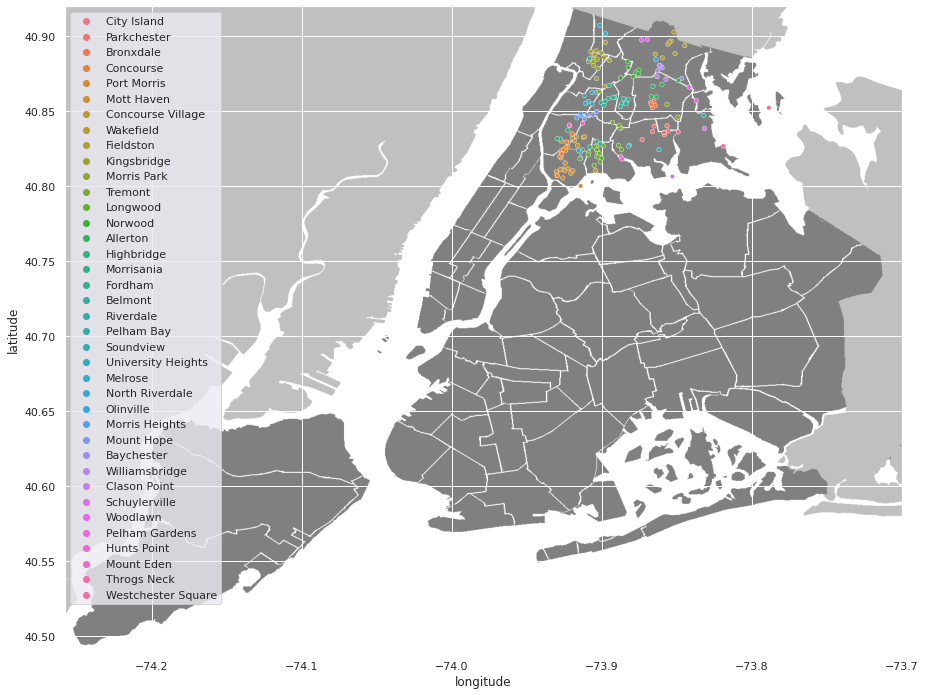

In [ ]:
plt.figure(figsize=(15,15))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data_bronx['longitude'], y=data_bronx['latitude'], hue='neighbourhood',s=20, data=data_bronx)
plt.legend()
plt.show()

In [ ]:
temp = data.neighbourhood_group == 'Bronx'
data_temp = data[temp]
data_temp[['neighbourhood','price']].groupby("neighbourhood").describe()

price                                                       \
                   count        mean         std   min     25%    50%     75%   
neighbourhood                                                                   
Allerton            37.0   91.027027   76.353158  33.0   47.00   70.0  105.00   
Baychester           6.0   72.166667   16.570053  53.0   62.25   72.0   75.00   
Belmont             23.0   78.739130   70.033899  24.0   30.00   55.0   99.50   
Bronxdale           19.0   57.105263   20.283805  25.0   41.50   50.0   75.50   
Castle Hill          9.0   63.000000   33.462666  38.0   39.00   39.0   86.00   
City Island         16.0  126.187500  130.602307  29.0   83.00   97.5  112.50   
Claremont Village   23.0   88.391304   76.243473  26.0   41.50   67.0  111.00   
Clason Point        20.0  113.650000  104.108888  40.0   45.75   77.5  110.00   
Co-op City           2.0   77.500000    3.535534  75.0   76.25   77.5   78.75   
Concourse           49.0   86.918367   49.093379  35.0   45.00   82.0  105.00   
Concourse Village   31.0   74.548387   34.008664  34.0   48.50   65.0   86.00   
East Morrisania      9.0   94.444444   46.800404  55.0   65.00   75.0  120.00   
Eastchester         13.0  141.692308  127.040272  45.0   68.00   75.0  155.00   
Edenwald            13.0   82.000000   28.618176  42.0   70.00   75.0   90.00   
Fieldston           12.0   75.083333   26.643977  49.0   56.75   67.0   87.50   
Fordham             61.0   68.803279   41.684457  21.0   40.00   59.0   79.00   
Highbridge          26.0   72.307692   41.380932  10.0   52.25   70.0   80.00   
Hunts Point         18.0   50.500000   27.181849  35.0   37.00   40.0   55.50   
Kingsbridge         69.0   78.550725   51.569923  27.0   50.00   70.0   90.00   
Longwood            58.0   92.241379   91.920124  27.0   56.25   75.0  100.00   
Melrose             10.0   83.300000   34.871351  42.0   59.25   74.5   99.75   
Morris Heights      15.0   81.866667   60.461164  20.0   46.00   55.0  105.00   
Morris Park         15.0   69.333333   41.880215  29.0   39.50   60.0   80.00   
Morrisania          18.0   83.444444   51.121795  23.0   50.00   73.5   80.00   
Mott Haven          54.0   91.703704   65.467731  35.0   56.25   79.0  118.75   
Mount Eden           5.0   64.200000   49.231088  25.0   43.00   48.0   55.00   
Mount Hope          17.0   81.588235   56.305038  24.0   40.00   63.0  105.00   
North Riverdale      9.0   83.222222   42.596296  40.0   40.00   77.0  119.00   
Norwood             30.0   71.400000   43.863896  26.0   46.25   57.0   78.25   
Olinville            3.0   77.000000   49.568135  26.0   53.00   80.0  102.50   
Parkchester         38.0   69.052632   52.364083  25.0   40.75   53.0   75.00   
Pelham Bay          17.0  105.000000   64.418553  37.0   59.00   89.0  125.00   
Pelham Gardens      27.0   93.407407   92.198473  20.0   41.50   75.0   86.50   
Port Morris         45.0   81.044444   51.046305  28.0   28.00   65.0  115.00   
Riverdale            9.0  255.333333  263.722392  49.0   90.00  150.0  250.00   
Schuylerville       10.0   62.800000   25.371900  20.0   43.00   67.0   81.50   
Soundview           15.0   53.466667   19.115688  28.0   45.00   49.0   55.00   
Spuyten Duyvil       3.0  180.000000  158.745079  60.0   90.00  120.0  240.00   
Throgs Neck         22.0   90.954545   62.308356  40.0   60.00   74.0   99.75   
Tremont             11.0   51.545455   34.468431  25.0   38.00   41.0   47.50   
Unionport            7.0  137.142857  138.680002  60.0   80.00   90.0  100.00   
University Heights  21.0   69.571429   39.164488  37.0   43.00   55.0   80.00   
Van Nest            11.0  113.818182  133.275518  20.0   22.50   50.0  128.50   
Wakefield           47.0   87.170213   73.343836  28.0   48.00   60.0   86.50   
West Farms           2.0  122.000000   60.811183  79.0  100.50  122.0  143.50   
Westchester Square  10.0  122.200000  193.029531  28.0   55.25   67.5   74.25   
Williamsbridge      39.0   97.512821   95.376780  

In [ ]:
data_bronx[['neighbourhood','price']].groupby("neighbourhood").describe()

price                                                \
                   count        mean         std    min     25%    50%   
neighbourhood                                                            
Allerton             5.0   57.200000   15.546704   34.0   49.00   63.0   
Baychester           1.0   60.000000         NaN   60.0   60.00   60.0   
Belmont              7.0   56.000000   36.665151   24.0   29.50   30.0   
Bronxdale            6.0   61.833333   24.943269   25.0   45.00   75.5   
City Island          1.0   84.000000         NaN   84.0   84.00   84.0   
Clason Point         1.0  350.000000         NaN  350.0  350.00  350.0   
Concourse           11.0   97.000000   46.649759   41.0   55.00   95.0   
Concourse Village    8.0   73.000000   37.439475   34.0   43.25   67.5   
Fieldston            5.0   71.600000   18.702941   49.0   59.00   70.0   
Fordham              7.0   49.142857   18.586990   21.0   34.50   59.0   
Highbridge           3.0   81.333333   29.670412   59.0   64.50   70.0   
Hunts Point          2.0   97.500000   74.246212   45.0   71.25   97.5   
Kingsbridge         12.0   69.333333   42.499911   27.0   33.75   70.0   
Longwood            17.0  115.294118  148.866452   30.0   65.00   80.0   
Melrose              3.0   50.000000    8.544004   42.0   45.50   49.0   
Morris Heights       3.0   83.000000   64.552304   20.0   50.00   80.0   
Morris Park          2.0   44.500000    7.778175   39.0   41.75   44.5   
Morrisania           4.0  122.500000   81.291656   50.0   61.25  107.5   
Mott Haven           8.0   74.625000   22.506745   45.0   62.25   76.0   
Mount Eden           3.0   74.333333   66.530695   25.0   36.50   48.0   
Mount Hope           4.0   46.000000   15.405627   24.0   43.50   50.0   
North Riverdale      2.0   98.000000   29.698485   77.0   87.50   98.0   
Norwood              8.0   64.625000   32.297446   29.0   38.25   61.5   
Olinville            1.0  125.000000         NaN  125.0  125.00  125.0   
Parkchester          8.0  107.375000   91.702839   40.0   61.00   65.0   
Pelham Bay           1.0   37.000000         NaN   37.0   37.00   37.0   
Pelham Gardens       2.0  167.500000  187.383297   35.0  101.25  167.5   
Port Morris          5.0   89.400000   70.928133   28.0   49.00   50.0   
Riverdale            2.0  130.000000   63.639610   85.0  107.50  130.0   
Schuylerville        1.0   85.000000         NaN   85.0   85.00   85.0   
Soundview            3.0   48.333333    2.886751   45.0   47.50   50.0   
Throgs Neck          1.0   40.000000         NaN   40.0   40.00   40.0   
Tremont              4.0   44.500000   16.441817   30.0   36.00   40.0   
University Heights   6.0   70.000000   27.748874   40.0   56.25   62.5   
Wakefield            8.0   51.875000   16.190275   28.0   46.25   51.0   
Westchester Square   1.0   52.000000         NaN   52.0   52.00   52.0   
Williamsbridge       6.0   67.666667   41.190614   35.0   42.00   52.5   
Woodlawn             2.0   60.000000   14.142136   50.0   55.00   60.0   

                                   
                       75%    max  
neighbourhood                      
Allerton             70.00   70.0  
Baychester           60.00   60.0  
Belmont              84.50  110.0  
Bronxdale            79.00   80.0  
City Island          84.00   84.0  
Clason Point        350.00  350.0  
Concourse           125.00  175.0  
Concourse Village    90.25  145.0  
Fieldston            85.00   95.0  
Fordham              65.00   65.0  
Highbridge           92.50  115.0  
Hunts Point         123.75  150.0  
Kingsbridge          81.25  175.0  
Longwood            100.00  680.0  
Melrose              54.00   59.0  
Morris Heights      114.50  149.0  
Morris Park          47.25   50.0  
Morrisania          168.75  225.0  
Mott Haven           80.25  120.0  
Mount Eden           99.00  150.0  
Mount Hope           52.50   60.0  
North Riverdale     108.50  119.0  
Norwood              81.75  125.0  
Olinville           125.00  125.0  
Parkchester 

## **Brooklyn**

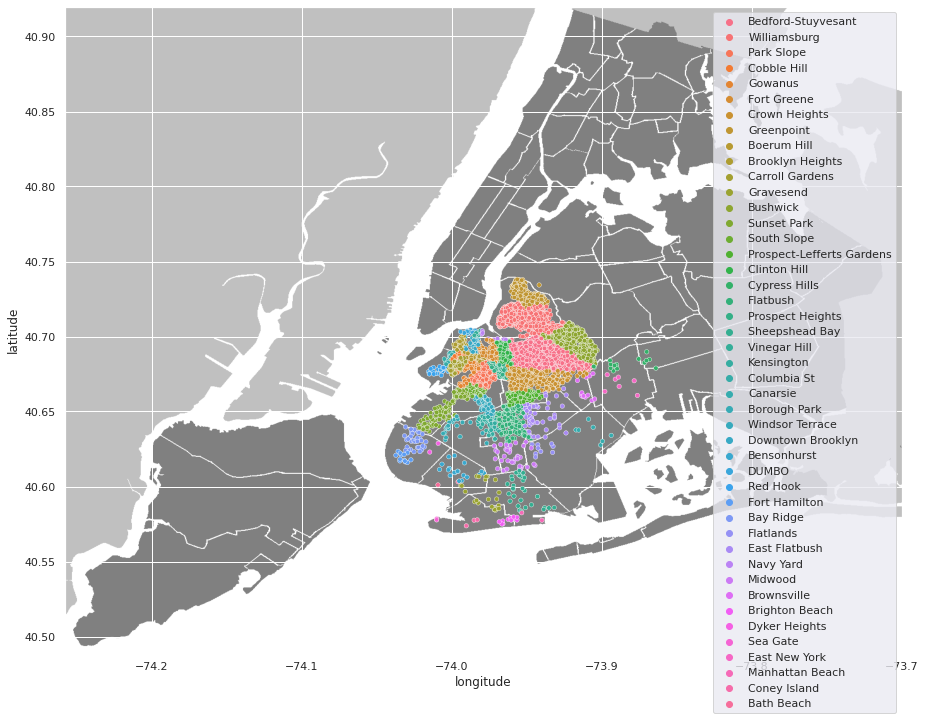

In [ ]:
plt.figure(figsize=(15,15))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data_Brooklyn['longitude'], y=data_Brooklyn['latitude'], hue='neighbourhood',s=20, data=data_Brooklyn)
plt.legend()
plt.show()

In [ ]:
temp = data.neighbourhood_group == 'Brooklyn'
data_temp = data[temp]
data_temp[['neighbourhood','price']].groupby("neighbourhood").describe()

price                                        \
                            count        mean         std   min     25%   
neighbourhood                                                             
Bath Beach                   17.0   81.764706   40.232961  33.0   50.00   
Bay Ridge                   134.0  103.925373   91.930885  18.0   60.00   
Bedford-Stuyvesant         3516.0  100.459898   75.950795  10.0   55.00   
Bensonhurst                  72.0   74.777778   33.597544  15.0   44.50   
Bergen Beach                 10.0  106.700000   49.161977  49.0   85.00   
Boerum Hill                 165.0  170.054545  102.255255  46.0  115.00   
Borough Park                135.0   63.140741   38.019666  20.0   43.50   
Brighton Beach               72.0   93.194444   46.046100  30.0   63.75   
Brooklyn Heights            146.0  192.143836  132.815453  50.0  115.75   
Brownsville                  59.0   77.627119   46.567674  28.0   49.50   
Bushwick                   2365.0   83.156871   60.172506  10.0   49.00   
Canarsie                    130.0  104.946154   89.264897  25.0   55.75   
Carroll Gardens             229.0  170.454148  107.794248  40.0  100.00   
Clinton Hill                545.0  145.708257  110.242852  35.0   79.00   
Cobble Hill                  91.0  189.604396  138.363521  59.0  110.50   
Columbia St                  40.0  139.725000   63.545658  55.0   97.00   
Coney Island                 17.0  123.705882  105.982171  25.0   70.00   
Crown Heights              1512.0  108.261905   84.836731  12.0   58.00   
Cypress Hills               125.0   94.200000  107.274445  19.0   42.00   
DUMBO                        32.0  195.375000   84.716510  74.0  125.00   
Downtown Brooklyn            82.0  150.963415   86.011547  39.0   97.50   
Dyker Heights                12.0   93.416667   51.044470  30.0   52.00   
East Flatbush               476.0   89.750000   67.878270  15.0   48.00   
East New York               206.0   84.640777   52.016762  25.0   48.25   
Flatbush                    604.0   88.942053   72.104390  20.0   50.00   
Flatlands                    80.0  108.000000   92.036179  22.0   49.00   
Fort Greene                 473.0  148.279070   96.802953  25.0   85.00   
Fort Hamilton                55.0   93.818182   40.232699  20.0   62.50   
Gowanus                     231.0  151.688312  100.135464  35.0   80.00   
Gravesend                    67.0   78.567164   52.958309  20.0   37.00   
Greenpoint                 1086.0  135.505525   86.677172  10.0   75.00   
Kensington                  172.0   93.523256   74.943055  24.0   49.00   
Manhattan Beach               8.0  103.500000   40.433367  45.0   73.00   
Midwood                     106.0   80.150943   40.596691  20.0   50.00   
Mill Basin                    4.0  179.750000  111.221626  85.0   85.00   
Navy Yard                    14.0  151.642857   55.463927  50.0  136.25   
Park Slope                  476.0  162.848739  100.576476  30.0  100.00   
Prospect Heights            329.0  145.565350  100.978397  34.0   80.00   
Prospect-Lefferts Gardens   509.0  102.648330   82.788342  22.0   60.00   
Red Hook                     76.0  144.947368  116.300977  30.0   84.00   
Sea Gate                      5.0  123.000000   59.076222  71.0   97.00   
Sheepshead Bay              155.0   95.303226   92.613733  20.0   45.50   
South Slope                 264.0  150.037879   84.162066  40.0   89.00   
Sunset Park                 379.0  102.886544   87.088991  10.0   50.00   
Vinegar Hill                 32.0  183.937500  105.578877  46.0  100.00   
Williamsburg               3749.0  138.828754   96.858918  10.0   74.00   
Windsor Terrace             150.0  139.353333   85.373254  38.0   77.25   

                                                 
                             50%     75%    max  
neighbourhood                                    
Bath Beach                  69.0   99.00  180.0  
Bay Ridge                   82.5  120.00  800.0  
Bedford-Stuyvesant         

In [ ]:
data_Brooklyn[['neighbourhood','price']].groupby("neighbourhood").describe()

price                                        \
                            count        mean         std   min     25%   
neighbourhood                                                             
Bath Beach                    2.0  122.500000   38.890873  95.0  108.75   
Bay Ridge                    34.0   68.176471   32.774224  18.0   36.25   
Bedford-Stuyvesant         1213.0   84.496290   58.908731  10.0   50.00   
Bensonhurst                  20.0   62.500000   30.971124  15.0   40.00   
Boerum Hill                  75.0  135.613333   61.603329  46.0   94.00   
Borough Park                 24.0   52.416667   17.477729  33.0   40.00   
Brighton Beach               11.0   96.818182   48.426890  50.0   67.50   
Brooklyn Heights             69.0  155.565217   62.594512  50.0  115.00   
Brownsville                  13.0   55.461538   21.014342  28.0   40.00   
Bushwick                   1010.0   72.850495   45.295270  10.0   45.00   
Canarsie                      7.0   86.857143   75.357876  27.0   45.50   
Carroll Gardens             111.0  163.144144  107.418963  40.0  100.00   
Clinton Hill                247.0  125.004049   93.406729  35.0   69.50   
Cobble Hill                  40.0  148.400000   84.634296  59.0   96.25   
Columbia St                  16.0  125.000000   49.296383  75.0   88.75   
Coney Island                  3.0   58.333333   38.188131  25.0   37.50   
Crown Heights               648.0   89.109568   56.545904  12.0   50.00   
Cypress Hills                16.0   57.062500   30.187125  25.0   35.00   
DUMBO                        16.0  171.437500   72.343596  74.0  125.00   
Downtown Brooklyn            44.0  131.795455   55.628577  49.0   83.75   
Dyker Heights                 2.0   72.000000    4.242641  69.0   70.50   
East Flatbush                65.0   93.830769   92.617758  15.0   48.00   
East New York                 7.0   75.428571   27.567234  44.0   54.00   
Flatbush                    254.0   84.082677   77.024591  22.0   50.00   
Flatlands                     9.0   98.000000   71.475520  27.0   59.00   
Fort Greene                 200.0  136.585000   74.731498  35.0   89.50   
Fort Hamilton                13.0   93.230769   42.665665  30.0   70.00   
Gowanus                      93.0  128.268817   82.926256  35.0   70.00   
Gravesend                    22.0   62.681818   60.715877  20.0   28.25   
Greenpoint                  525.0  116.680000   66.008591  20.0   70.00   
Kensington                   73.0   84.438356   48.403107  24.0   46.00   
Manhattan Beach               2.0  114.500000   50.204581  79.0   96.75   
Midwood                      40.0   68.500000   26.480762  26.0   50.00   
Navy Yard                     8.0  155.750000   73.858455  50.0  130.00   
Park Slope                  213.0  142.948357   81.729837  30.0   94.00   
Prospect Heights            166.0  126.397590   89.987803  34.0   75.00   
Prospect-Lefferts Gardens   208.0   92.153846   52.445743  22.0   60.00   
Red Hook                     26.0  137.000000   99.929575  30.0   80.00   
Sea Gate                      3.0  130.333333   81.297806  71.0   84.00   
Sheepshead Bay               32.0   83.843750   48.047765  25.0   48.75   
South Slope                 112.0  144.098214   75.937499  40.0   85.00   
Sunset Park                 140.0   90.400000   69.068082  22.0   47.75   
Vinegar Hill                 13.0  190.384615   88.949928  46.0  150.00   
Williamsburg               1851.0  121.309562   80.161896  26.0   66.00   
Windsor Terrace              63.0  132.603175   72.933806  45.0   76.00   

                                                 
                             50%     75%    max  
neighbourhood                                    
Bath Beach                 122.5  136.25  150.0  
Bay Ridge                   67.5   93.75  135.0  
Bedford-Stuyvesant          65.0  100.00  750.0  
Bensonhurst                 54.5   72.50  125.0  
Boerum Hill                125.0  170.00  350.0  
Borough Park               

## **Manhattan**

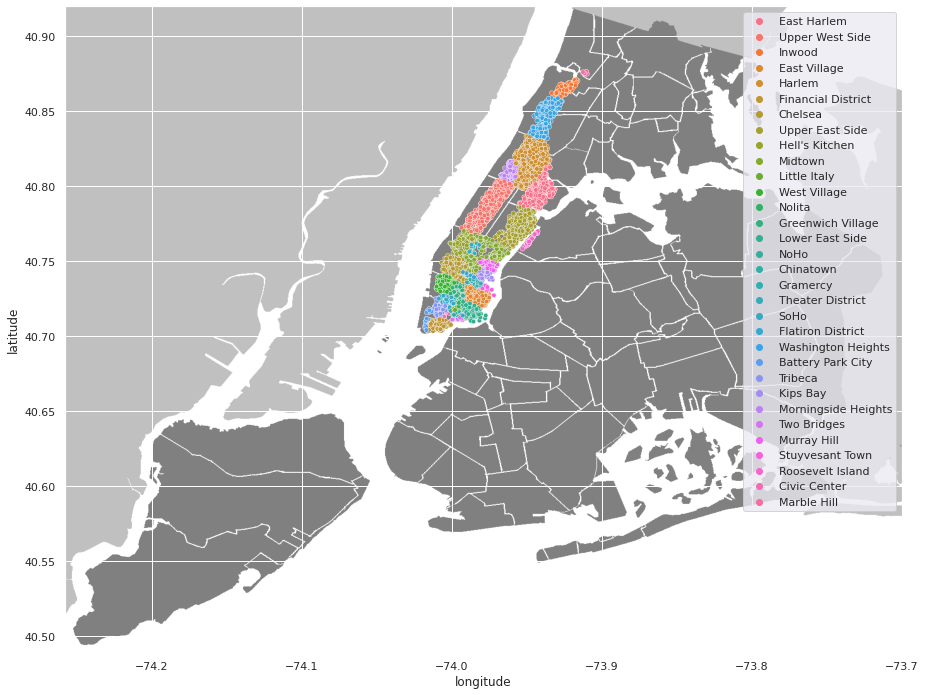

In [ ]:
plt.figure(figsize=(15,15))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data_Manhattan['longitude'], y=data_Manhattan['latitude'], hue='neighbourhood',s=20, data=data_Manhattan)
plt.legend()
plt.show()

In [ ]:
temp = data.neighbourhood_group == 'Manhattan'
data_temp = data[temp]
data_temp[['neighbourhood','availability_365']].groupby("neighbourhood").describe()

availability_365                                           \
                               count        mean         std  min  25%    50%   
neighbourhood                                                                   
Battery Park City               59.0   73.474576  129.213050  0.0  0.0    0.0   
Chelsea                        981.0   99.151886  129.769027  0.0  0.0   17.0   
Chinatown                      351.0   86.487179  116.266488  0.0  0.0   15.0   
Civic Center                    49.0   68.755102  112.287676  0.0  0.0    7.0   
East Harlem                   1051.0   96.972407  120.382447  0.0  0.0   32.0   
East Village                  1743.0   67.915089  109.827710  0.0  0.0    0.0   
Financial District             473.0  129.477801  142.294976  0.0  0.0   60.0   
Flatiron District               71.0  109.126761  142.076029  0.0  0.0    9.0   
Gramercy                       316.0   87.069620  124.643778  0.0  0.0   10.0   
Greenwich Village              364.0   72.565934  111.154515  0.0  0.0    1.5   
Harlem                        2543.0  102.740071  124.859548  0.0  0.0   37.0   
Hell's Kitchen                1750.0  128.546286  135.507533  0.0  0.0   74.0   
Inwood                         246.0   97.711382  125.545902  0.0  0.0   19.0   
Kips Bay                       434.0  114.868664  139.138736  0.0  0.0   21.0   
Little Italy                   112.0   97.964286  120.806369  0.0  0.0   35.0   
Lower East Side                858.0   93.078089  123.773459  0.0  0.0   12.0   
Marble Hill                     12.0  114.666667  144.996761  0.0  0.0   26.0   
Midtown                       1402.0  150.422967  142.398166  0.0  0.0  139.0   
Morningside Heights            338.0   40.118343   88.877759  0.0  0.0    0.0   
Murray Hill                    413.0  164.745763  150.936882  0.0  0.0  140.0   
NoHo                            76.0   98.592105  120.930082  0.0  0.0   37.0   
Nolita                         240.0   63.450000   99.899560  0.0  0.0    0.0   
Roosevelt Island                73.0   70.068493  117.243376  0.0  0.0    0.0   
SoHo                           332.0  102.421687  125.611916  0.0  0.0   36.5   
Stuyvesant Town                 35.0   62.285714  105.969633  0.0  0.0    0.0   
Theater District               198.0  174.949495  145.958333  0.0  3.0  188.5   
Tribeca                        127.0   90.448819  123.302680  0.0  0.0   20.0   
Two Bridges                     65.0   90.076923  114.845590  0.0  0.0   42.0   
Upper East Side               1703.0  107.738109  133.938046  0.0  0.0   23.0   
Upper West Side               1839.0   90.880370  126.131608  0.0  0.0    4.0   
Washington Heights             867.0   95.723183  122.776114  0.0  0.0   27.0   
West Village                   708.0   76.723164  116.464561  0.0  0.0    3.0   

                                    
                        75%    max  
neighbourhood                       
Battery Park City     57.00  363.0  
Chelsea              195.00  365.0  
Chinatown            165.50  365.0  
Civic Center          89.00  365.0  
East Harlem          179.00  365.0  
East Village          92.50  365.0  
Financial District   298.00  365.0  
Flatiron District    197.50  365.0  
Gramercy             171.50  365.0  
Greenwich Village    130.00  365.0  
Harlem               193.00  365.0  
Hell's Kitchen       252.00  365.0  
Inwood               179.75  365.0  
Kips Bay             260.75  365.0  
Little Italy         172.25  362.0  
Lower East Side      185.00  365.0  
Marble Hill          255.50  349.0  
Midtown              300.75  365.0  
Morningside Heights   19.50  365.0  
Murray Hill          335.00  365.0  
NoHo                 179.00  364.0  
Nolita                91.75  365.0  
Roosevelt Island      73.00  362.0  
SoHo                 179.25  365.0  
Stuyvesant Town       86.50  365.0  
Theater District     317.00  365.0  
Tribeca              136.00  365.0  
Two Bridges          153.00  359.0  
Upper East Side      229.50  365.0  


In [ ]:
data_Manhattan[['neighbourhood','availability_365']].groupby("neighbourhood").describe()

availability_365                                   
                               count mean  std  min  25%  50%  75%  max
neighbourhood                                                          
Battery Park City               34.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Chelsea                        394.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Chinatown                      141.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Civic Center                    24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
East Harlem                    371.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
East Village                   888.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Financial District             168.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Flatiron District               29.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Gramercy                       137.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Greenwich Village              180.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Harlem                         920.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Hell's Kitchen                 507.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Inwood                          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Kips Bay                       188.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Little Italy                    38.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Lower East Side                379.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Marble Hill                      6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Midtown                        443.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Morningside Heights            218.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Murray Hill                    116.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
NoHo                            25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Nolita                         121.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Roosevelt Island                42.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
SoHo                           111.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Stuyvesant Town                 18.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Theater District                47.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Tribeca                         52.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Two Bridges                     25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Upper East Side                697.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Upper West Side                870.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Washington Heights             348.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
West Village                   340.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

## **Queens**

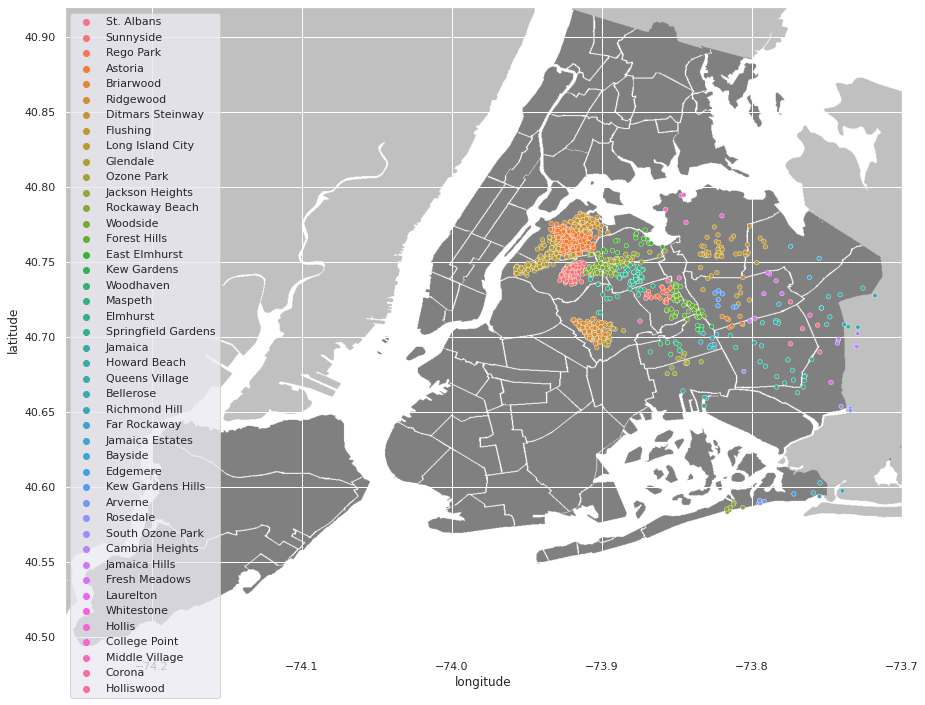

In [ ]:
plt.figure(figsize=(15,15))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data_Queens['longitude'], y=data_Queens['latitude'], hue='neighbourhood',s=20, data=data_Queens)
plt.legend()
plt.show()

In [ ]:
temp = data.neighbourhood_group == 'Queens'
data_temp = data[temp]
data_temp[['neighbourhood','price']].groupby("neighbourhood").describe()

price                                                \
                     count        mean         std    min     25%    50%   
neighbourhood                                                              
Arverne               74.0  156.648649  119.138854   35.0   76.25  127.0   
Astoria              863.0  100.880649   66.125335   25.0   60.00   85.0   
Bay Terrace            6.0  142.000000   82.561492   32.0   92.25  141.5   
Bayside               36.0   96.000000   73.252596   30.0   47.75   67.0   
Bayswater             16.0   87.812500   49.841373   45.0   54.25   65.0   
Belle Harbor           8.0  171.500000   90.700449   85.0  103.00  155.0   
Bellerose             14.0   99.357143   55.614894   42.0   61.25   85.0   
Breezy Point           3.0  213.333333   31.754265  195.0  195.00  195.0   
Briarwood             55.0   89.618182   61.415251   30.0   55.50   70.0   
Cambria Heights       25.0   83.000000   55.139218   31.0   50.00   60.0   
College Point         18.0   89.277778   82.412739   44.0   53.50   60.0   
Corona                60.0   58.500000   50.641813   23.0   33.75   40.0   
Ditmars Steinway     297.0   94.794613   65.087220   22.0   55.00   79.0   
Douglaston             8.0   82.750000   48.446583   40.0   45.00   65.0   
East Elmhurst        119.0   89.596639   75.652900   16.0   49.00   70.0   
Edgemere              11.0   94.727273   64.957049   40.0   46.50   65.0   
Elmhurst             232.0   79.905172   61.301819   15.0   42.00   59.0   
Far Rockaway          27.0  112.407407  116.543574   35.0   40.00   60.0   
Flushing             396.0   89.792929   78.501714   15.0   50.00   65.0   
Forest Hills         142.0  100.450704   72.105279   16.0   59.00   79.5   
Fresh Meadows         29.0   99.965517   83.090090   39.0   55.00   69.0   
Glendale              53.0   92.037736   56.640894   25.0   49.00   85.0   
Hollis                14.0   88.642857   38.509953   50.0   57.50   77.5   
Holliswood             4.0  135.750000   71.355331   79.0   94.75  112.5   
Howard Beach          18.0  112.388889   62.756428   40.0   57.00  100.0   
Jackson Heights      179.0   80.988827   47.171691   23.0   49.00   68.0   
Jamaica              199.0   94.527638   69.840496   10.0   54.50   70.0   
Jamaica Estates       17.0  192.764706  177.486454   35.0   68.00  145.0   
Jamaica Hills          6.0  119.166667  103.412604   50.0   65.00   82.5   
Kew Gardens           30.0   89.266667   52.774689   35.0   51.25   67.5   
Kew Gardens Hills     25.0  113.840000   80.166327   40.0   50.00   95.0   
Laurelton             16.0   97.875000   69.720274   34.0   41.50   75.0   
Little Neck            5.0   75.200000   48.669292   32.0   45.00   50.0   
Long Island City     514.0  122.068093   81.883179   30.0   69.00   99.0   
Maspeth              107.0   84.214953   47.586471   11.0   50.00   65.0   
Middle Village        28.0  113.714286   60.342146   44.0   70.00  100.0   
Neponsit               3.0  274.666667   75.002222  200.0  237.00  274.0   
Ozone Park            57.0   85.649123   39.139171   25.0   60.00   79.0   
Queens Village        51.0   81.725490   51.474296   25.0   47.00   70.0   
Rego Park            104.0   83.778846   61.012486   21.0   46.50   65.5   
Richmond Hill         86.0   88.558140   61.018918   28.0   50.00   63.0   
Ridgewood            409.0   76.303178   49.882814   20.0   45.00   60.0   
Rockaway Beach        54.0  131.888889   80.526257   49.0   85.25  122.5   
Rosedale              54.0   78.018519   56.663019   22.0   51.25   66.0   
South Ozone Park      33.0   80.484848   72.068163   29.0   34.00   64.0   
Springfield Gardens   62.0  103.209677   54.685131   41.0   61.25   92.5   
St. Albans            68.0  105.014706  101.652979   25.0   55.00   64.5   
Sunnyside            353.0   84.430595   52.151891   12.0   50.00   75.0   
Whitestone            11.0  107.545455  116.756468   35.0   39.50   49.0   
Woodhaven             82.0   69.048780   41.328226   10.0   45.00   5

In [ ]:
data_Queens[['neighbourhood','price']].groupby("neighbourhood").describe()

price                                                \
                     count        mean         std    min     25%    50%   
neighbourhood                                                              
Arverne                4.0  111.250000   60.052061   60.0   60.00  105.0   
Astoria              346.0   94.216763   50.261713   27.0   60.00   86.0   
Bayside                3.0   97.000000   81.098705   41.0   50.50   60.0   
Bellerose              2.0   68.500000   37.476659   42.0   55.25   68.5   
Briarwood              8.0   61.000000   15.748016   45.0   47.25   60.0   
Cambria Heights        6.0   77.833333   43.915449   31.0   41.00   73.5   
College Point          4.0   73.750000   34.490337   45.0   48.75   65.0   
Corona                 2.0   73.000000   38.183766   46.0   59.50   73.0   
Ditmars Steinway      99.0   91.818182   71.885732   22.0   57.50   75.0   
East Elmhurst         20.0   84.450000   52.403771   16.0   48.00   64.5   
Edgemere               1.0  195.000000         NaN  195.0  195.00  195.0   
Elmhurst              58.0   71.706897   45.906468   30.0   40.00   55.0   
Far Rockaway           4.0  159.000000  195.960880   35.0   47.00   75.5   
Flushing              56.0   84.803571   73.691351   20.0   47.00   61.5   
Forest Hills          45.0   96.933333   64.506659   30.0   59.00   75.0   
Fresh Meadows          5.0  105.000000  102.164084   40.0   45.00   75.0   
Glendale              12.0   99.250000   41.831100   40.0   81.00   97.5   
Hollis                 1.0  100.000000         NaN  100.0  100.00  100.0   
Holliswood             1.0  100.000000         NaN  100.0  100.00  100.0   
Howard Beach           4.0   73.750000   30.379544   45.0   48.75   75.0   
Jackson Heights       35.0   81.514286   39.867701   23.0   48.50   75.0   
Jamaica               19.0   67.105263   25.755031   29.0   50.00   60.0   
Jamaica Estates        1.0  750.000000         NaN  750.0  750.00  750.0   
Jamaica Hills          2.0   57.500000   10.606602   50.0   53.75   57.5   
Kew Gardens            6.0  101.666667   53.820690   40.0   77.50  100.0   
Kew Gardens Hills      7.0   79.857143   55.061870   40.0   42.50   50.0   
Laurelton              1.0   37.000000         NaN   37.0   37.00   37.0   
Long Island City     178.0  109.106742   50.588680   30.0   69.25  100.0   
Maspeth               12.0   66.000000   24.885191   30.0   49.00   66.5   
Middle Village         2.0   82.500000   24.748737   65.0   73.75   82.5   
Ozone Park            11.0   68.000000   54.514218   25.0   30.00   45.0   
Queens Village         9.0   67.111111   43.414987   35.0   38.00   55.0   
Rego Park             21.0   52.904762   25.808729   21.0   39.00   48.0   
Richmond Hill          9.0   77.666667   33.151169   50.0   59.00   60.0   
Ridgewood            145.0   69.620690   40.927454   23.0   42.00   60.0   
Rockaway Beach         7.0  103.571429   29.102446   66.0   85.50   88.0   
Rosedale               4.0   71.750000   42.098100   22.0   58.00   70.0   
South Ozone Park       1.0   29.000000         NaN   29.0   29.00   29.0   
Springfield Gardens    4.0  106.750000   85.347818   45.0   48.00   77.0   
St. Albans             4.0   61.250000   12.500000   45.0   56.25   62.5   
Sunnyside            117.0   88.299145   62.076602   30.0   55.00   78.0   
Whitestone             1.0   40.000000         NaN   40.0   40.00   40.0   
Woodhaven              9.0   72.666667   56.409219   30.0   35.00   50.0   
Woodside              60.0   81.533333   94.598073   28.0   38.75   50.0   

                                    
                        75%    max  
neighbourhood                       
Arverne              156.25  175.0  
Astoria              112.00  500.0  
Bayside              125.00  190.0  
Bellerose             81.75   95.0  
Briarwood             71.25   85.0  
Cambria Heights      115.00  130.0  
College Point         90.00  120.0  
Corona                86.50  100.0  
Ditmars Steinway     100.00  600.0  
East

## **Statten Islands**

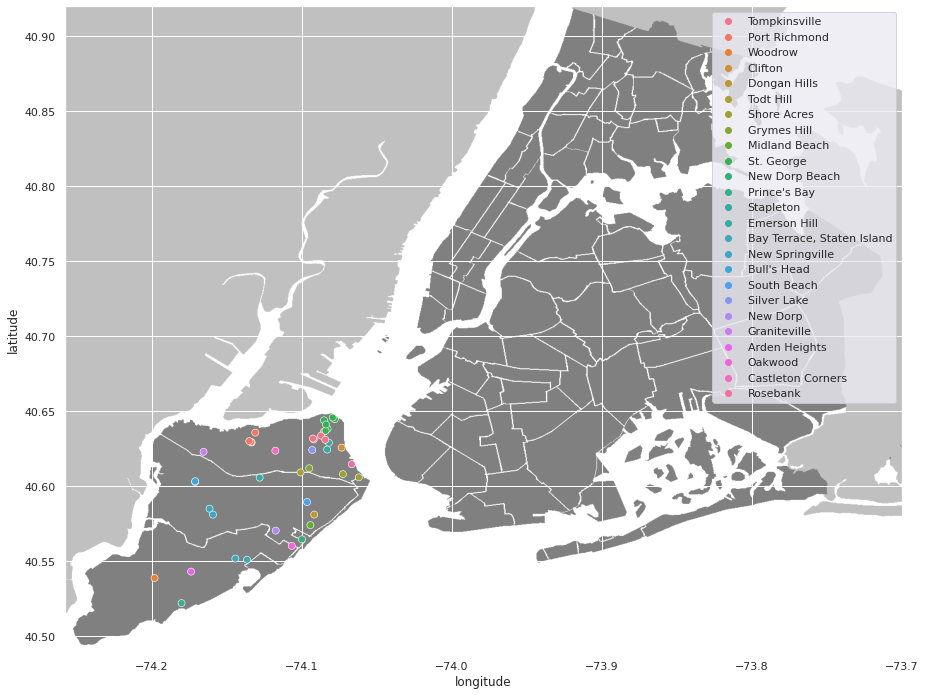

In [ ]:
plt.figure(figsize=(15,15))
nyc_img=plt.imread(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
sns.scatterplot(x=data_Staten_Island['longitude'], y=data_Staten_Island['latitude'], hue='neighbourhood',s=50, data=data_Staten_Island)
plt.legend()
plt.show()

In [ ]:
temp = data.neighbourhood_group == 'Staten Island'
data_temp = data[temp]
data_temp[['neighbourhood','price']].groupby("neighbourhood").describe()

price                                         \
                           count        mean         std    min     25%   
neighbourhood                                                             
Arden Heights                4.0   67.250000   18.300729   41.0   62.75   
Arrochar                    21.0  115.000000  133.119120   32.0   34.00   
Bay Terrace, Staten Island   2.0  102.500000   67.175144   55.0   78.75   
Bull's Head                  6.0   47.333333   18.457158   25.0   39.25   
Castleton Corners            4.0  139.750000  115.514429   45.0   60.00   
Clifton                     13.0   87.615385   37.679655   40.0   60.00   
Concord                     26.0   58.192308   45.507818   29.0   32.00   
Dongan Hills                 7.0   79.428571   38.746428   37.0   57.00   
Eltingville                  3.0  141.666667  136.434355   56.0   63.00   
Emerson Hill                 5.0   68.200000   17.711578   49.0   49.00   
Fort Wadsworth               1.0  800.000000         NaN  800.0  800.00   
Graniteville                 3.0   68.666667   47.542963   20.0   45.50   
Grant City                   6.0   57.666667   22.791811   29.0   37.50   
Great Kills                 10.0  100.600000   62.764463   40.0   54.50   
Grymes Hill                  7.0  159.142857   73.269886   89.0  112.50   
Howland Hook                 2.0  100.000000    0.000000  100.0  100.00   
Huguenot                     3.0  118.333333   54.848276   75.0   87.50   
Lighthouse Hill              2.0  157.500000   60.104076  115.0  136.25   
Mariners Harbor              7.0  102.428571   58.940244   40.0   58.50   
Midland Beach                6.0   91.833333   19.343388   61.0   82.50   
New Brighton                 5.0  101.800000   87.371048   40.0   50.00   
New Dorp                     1.0   57.000000         NaN   57.0   57.00   
New Dorp Beach               4.0   61.750000   33.509949   36.0   39.00   
New Springville              8.0   76.000000   38.018792   43.0   51.50   
Oakwood                      5.0   81.200000   33.536547   46.0   65.00   
Port Richmond                9.0   90.111111   82.851440   40.0   47.00   
Prince's Bay                 3.0  129.333333   50.954228   85.0  101.50   
Randall Manor               18.0   76.888889   40.397858   13.0   51.25   
Richmondtown                 1.0   78.000000         NaN   78.0   78.00   
Rosebank                     5.0  109.000000   59.518905   55.0   65.00   
Rossville                    1.0   75.000000         NaN   75.0   75.00   
Shore Acres                  7.0  152.714286  106.567216   54.0   75.00   
Silver Lake                  2.0   70.000000   14.142136   60.0   65.00   
South Beach                  7.0   94.142857   85.548093   20.0   42.50   
St. George                  44.0  100.136364   50.983623   29.0   68.00   
Stapleton                   26.0  100.076923   88.007692   34.0   50.50   
Todt Hill                    4.0  169.000000  177.356515   50.0   59.00   
Tompkinsville               38.0   77.789474   44.914428   30.0   49.25   
Tottenville                  7.0  144.857143   98.311458   70.0   80.00   
West Brighton               17.0   81.176471   49.081864   37.0   49.00   
Westerleigh                  2.0   71.500000   44.547727   40.0   55.75   
Willowbrook                  1.0  249.000000         NaN  249.0  249.00   
Woodrow                      1.0  700.000000         NaN  700.0  700.00   

                                                  
                              50%     75%    max  
neighbourhood                                     
Arden Heights                72.5   77.00   83.0  
Arrochar                     65.0  125.00  625.0  
Bay Terrace, Staten Island  102.5  126.25  150.0  
Bull's Head                  45.0   50.00   80.0  
Castleton Corners           107.5  187.25  299.0  
Clifton                      75.0  100.00  165.0  
Concord                      34.5   75.00  200.0  
Dongan Hills                 70.0   90.00  155.0  
Eltingville    

In [ ]:
data_Staten_Island[['neighbourhood','price']].groupby("neighbourhood").describe()

price                                         \
                           count        mean         std    min     25%   
neighbourhood                                                             
Arden Heights                1.0   41.000000         NaN   41.0   41.00   
Bay Terrace, Staten Island   2.0  102.500000   67.175144   55.0   78.75   
Bull's Head                  2.0   32.000000    9.899495   25.0   28.50   
Castleton Corners            1.0  150.000000         NaN  150.0  150.00   
Clifton                      1.0   75.000000         NaN   75.0   75.00   
Dongan Hills                 1.0  155.000000         NaN  155.0  155.00   
Emerson Hill                 1.0   85.000000         NaN   85.0   85.00   
Graniteville                 1.0   71.000000         NaN   71.0   71.00   
Grymes Hill                  1.0  200.000000         NaN  200.0  200.00   
Midland Beach                1.0  100.000000         NaN  100.0  100.00   
New Dorp                     1.0   57.000000         NaN   57.0   57.00   
New Dorp Beach               1.0   62.000000         NaN   62.0   62.00   
New Springville              2.0  104.000000   65.053824   58.0   81.00   
Oakwood                      1.0   46.000000         NaN   46.0   46.00   
Port Richmond                4.0  141.750000  108.910896   46.0   49.00   
Prince's Bay                 1.0  185.000000         NaN  185.0  185.00   
Rosebank                     1.0  135.000000         NaN  135.0  135.00   
Shore Acres                  2.0  232.500000   95.459415  165.0  198.75   
Silver Lake                  1.0   60.000000         NaN   60.0   60.00   
South Beach                  1.0   20.000000         NaN   20.0   20.00   
St. George                   6.0   77.833333   41.667333   40.0   50.00   
Stapleton                    2.0   69.000000   28.284271   49.0   59.00   
Todt Hill                    1.0  429.000000         NaN  429.0  429.00   
Tompkinsville                5.0   66.000000   29.231832   37.0   48.00   
Woodrow                      1.0  700.000000         NaN  700.0  700.00   

                                                  
                              50%     75%    max  
neighbourhood                                     
Arden Heights                41.0   41.00   41.0  
Bay Terrace, Staten Island  102.5  126.25  150.0  
Bull's Head                  32.0   35.50   39.0  
Castleton Corners           150.0  150.00  150.0  
Clifton                      75.0   75.00   75.0  
Dongan Hills                155.0  155.00  155.0  
Emerson Hill                 85.0   85.00   85.0  
Graniteville                 71.0   71.00   71.0  
Grymes Hill                 200.0  200.00  200.0  
Midland Beach               100.0  100.00  100.0  
New Dorp                     57.0   57.00   57.0  
New Dorp Beach               62.0   62.00   62.0  
New Springville             104.0  127.00  150.0  
Oakwood                      46.0   46.00   46.0  
Port Richmond               135.5  228.25  250.0  
Prince's Bay                185.0  185.00  185.0  
Rosebank                    135.0  135.00  135.0  
Shore Acres                 232.5  266.25  300.0  
Silver Lake                  60.0   60.00   60.0  
South Beach                  20.0   20.00   20.0  
St. George                   63.5   94.25  150.0  
Stapleton                    69.0   79.00   89.0  
Todt Hill                   429.0  429.00  429.0  
Tompkinsville                50.0   95.00  100.0  
Woodrow                     700.0  700.00  700.0

## **Test Neighbourhoods**

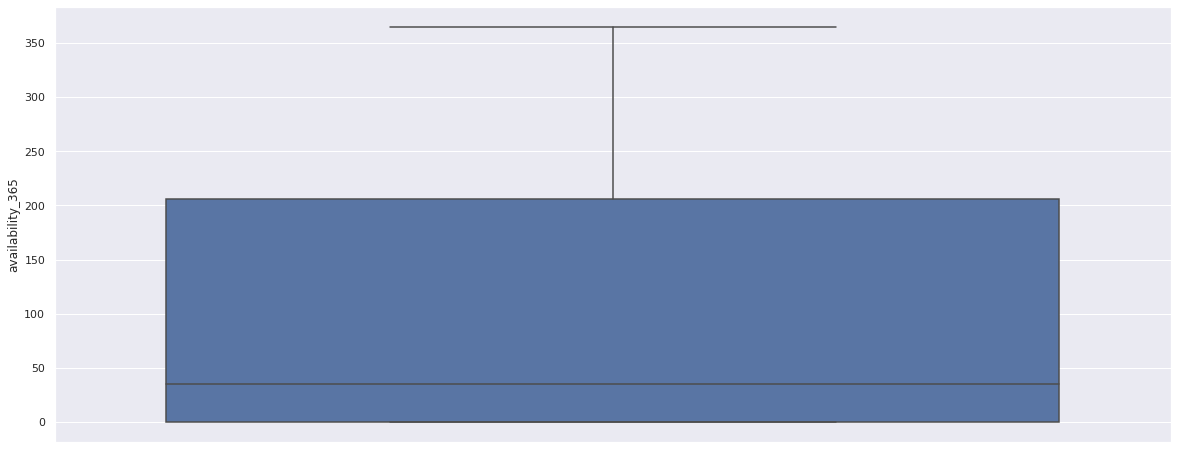

In [ ]:
plt.figure(figsize=(20,8))

sns.boxplot(y='availability_365' , data = data)

### **Astoria**

In [ ]:
temp = data.neighbourhood == "Astoria"
data_A = data[temp]
data_A

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log
348,35375,Queens,Astoria,40.75961,-73.91117,Private room,80,1,42,2019-07-06,1.2100,2,365,4.382027
385,585166,Queens,Astoria,40.76434,-73.92132,Entire home/apt,110,4,30,2019-06-16,0.3200,1,363,4.700480
505,864735,Queens,Astoria,40.75744,-73.92163,Entire home/apt,107,30,21,2018-12-01,0.2200,8,200,4.672829
506,864735,Queens,Astoria,40.75695,-73.92020,Entire home/apt,95,30,24,2019-04-04,0.2600,8,271,4.553877
776,1452026,Queens,Astoria,40.77117,-73.91905,Private room,30,5,3,2017-06-20,0.0300,1,0,3.401197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,273570019,Queens,Astoria,40.76349,-73.92577,Private room,75,1,0,2019-06-23,1.1804,1,359,4.317488
48685,14258377,Queens,Astoria,40.76389,-73.91963,Private room,50,4,0,2019-06-23,1.1804,1,38,3.912023
48797,122204600,Queens,Astoria,40.76431,-73.90992,Private room,49,15,0,2019-06-23,1.1804,1,341,3.891820
48822,183211776,Queens,Astoria,40.76491,-73.90959,Entire home/apt,169,1,0,2019-06-23,1.1804,4,28,5.129899


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


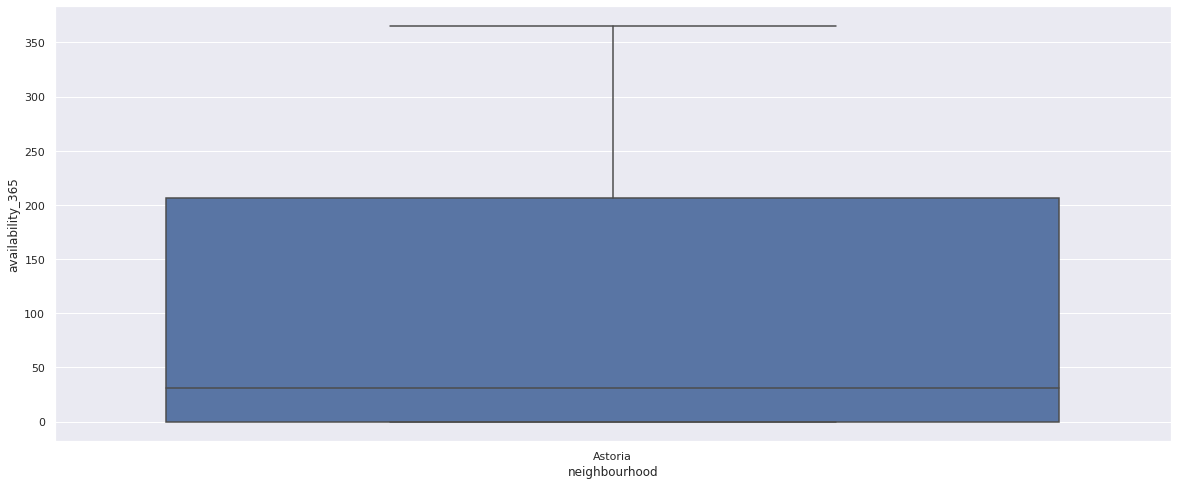

In [ ]:
plt.figure(figsize=(20,8))

sns.boxplot('neighbourhood' , 'availability_365' , data = data_A)

In [ ]:
stats.ttest_ind(data_A.availability_365,data.sample(900).availability_365)

Ttest_indResult(statistic=0.27947747812943213, pvalue=0.779911239362638)

### **Financial District**

In [ ]:
temp = data.neighbourhood == "Financial District"
data_C = data[temp]
data_C

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log
174,193722,Manhattan,Financial District,40.70666,-74.01374,Entire home/apt,196,3,114,2019-06-20,1.0600,1,0,5.278115
709,568103,Manhattan,Financial District,40.70523,-74.01345,Private room,101,7,51,2019-06-02,0.5500,1,307,4.615121
735,638721,Manhattan,Financial District,40.70741,-74.00102,Private room,65,30,10,2019-06-24,1.0200,1,0,4.174387
979,1965972,Manhattan,Financial District,40.70621,-74.01525,Entire home/apt,225,4,27,2019-05-25,0.3100,1,169,5.416100
1018,2059155,Manhattan,Financial District,40.70537,-74.00992,Entire home/apt,160,1,36,2018-09-26,0.5700,1,365,5.075174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48637,28983064,Manhattan,Financial District,40.70664,-74.01258,Private room,57,30,0,2019-06-23,1.1804,1,66,4.043051
48667,273524881,Manhattan,Financial District,40.70787,-74.00780,Entire home/apt,158,7,0,2019-06-23,1.1804,1,70,5.062595
48675,90870599,Manhattan,Financial District,40.70822,-74.01418,Entire home/apt,225,4,0,2019-06-23,1.1804,1,79,5.416100
48804,112024431,Manhattan,Financial District,40.70597,-74.01562,Private room,99,4,0,2019-06-23,1.1804,1,22,4.595120


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


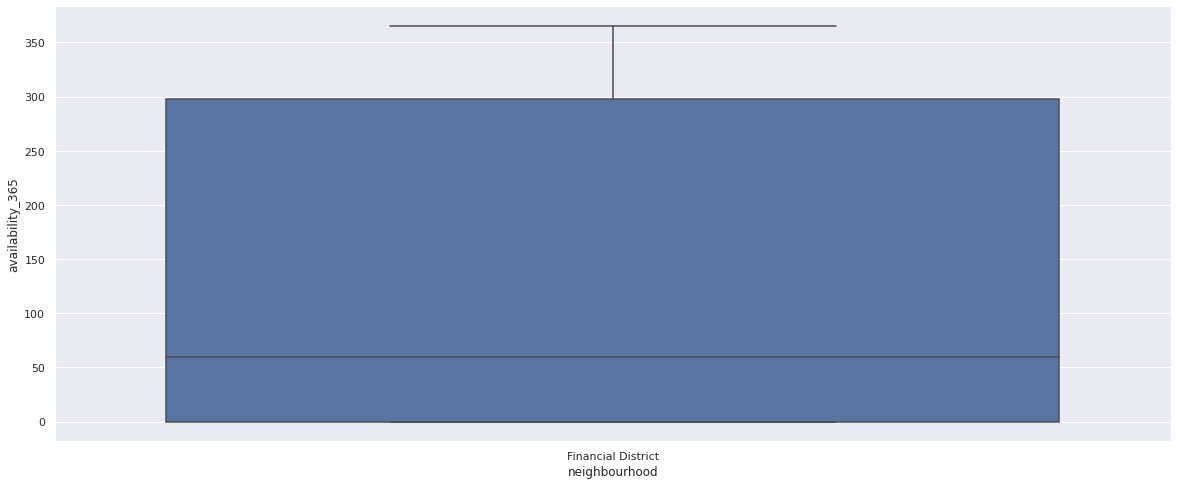

In [ ]:
plt.figure(figsize=(20,8))

sns.boxplot('neighbourhood' , 'availability_365' , data = data_C)

In [ ]:
stats.ttest_rel(data_C.availability_365,data.sample(473).availability_365)

Ttest_relResult(statistic=1.8797928240999453, pvalue=0.060752034756584014)

In [ ]:
data_C[['availability_365','room_type']].groupby("room_type").describe()

availability_365                                          \
                           count        mean         std  min  25%   50%   
room_type                                                                  
Entire home/apt            314.0  141.257962  141.069354  0.0  0.0  82.5   
Private room               150.0  106.080000  143.246937  0.0  0.0   6.0   
Shared room                  9.0  108.444444  132.762110  0.0  0.0  83.0   

                                
                    75%    max  
room_type                       
Entire home/apt  304.75  365.0  
Private room     201.75  365.0  
Shared room      179.00  357.0

In [ ]:
data[['availability_365','room_type']].groupby("room_type").describe()

availability_365                                          \
                           count        mean         std  min  25%   50%   
room_type                                                                  
Entire home/apt          23417.0  102.691378  126.322117  0.0  0.0  29.0   
Private room             21198.0  108.246061  131.796003  0.0  0.0  38.0   
Shared room               1117.0  160.418979  151.803861  0.0  0.0  90.0   

                               
                   75%    max  
room_type                      
Entire home/apt  201.0  365.0  
Private room     199.0  365.0  
Shared room      342.0  365.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


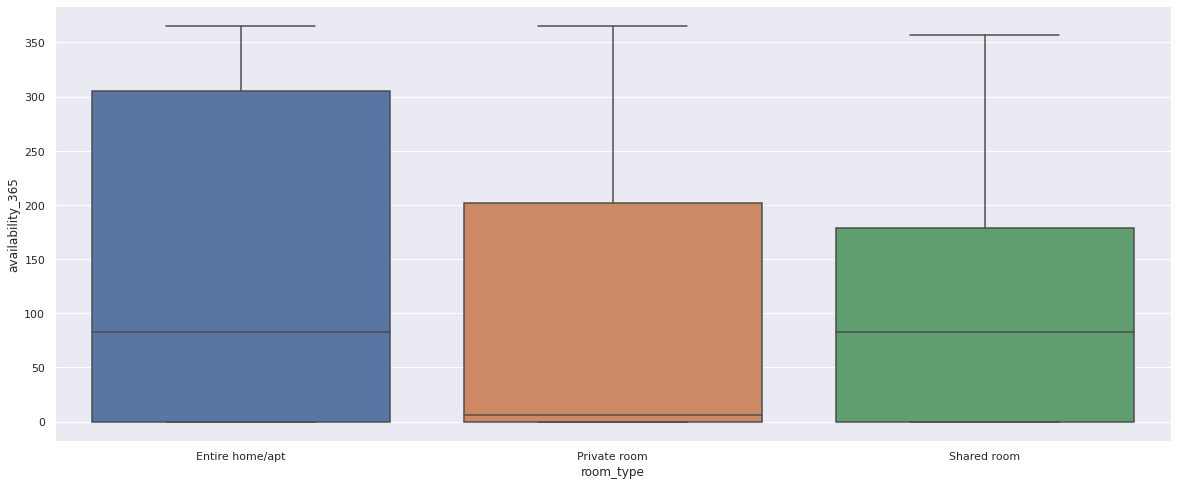

In [ ]:
plt.figure(figsize=(20,8))

sns.boxplot('room_type' ,'availability_365', data = data_C)

# **Hosts**

In [ ]:
data

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.2100,6,365,5.003946
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.3800,2,355,5.416100
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.1804,1,365,5.010635
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1000,1,0,4.382027
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.5900,1,129,5.298317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.1804,2,9,4.248495
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.1804,2,36,3.688879
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.1804,1,27,4.744932
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.1804,6,2,4.007333


In [ ]:
data['host_id'].value_counts()

137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
            ... 
72019599       1
18933388       1
5163395        1
923412         1
68119814       1
Name: host_id, Length: 35899, dtype: int64

In [ ]:
temp = data['host_id'] == 137358866
host1 = data[temp]
host1

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log
32718,137358866,Manhattan,Harlem,40.81118,-73.94231,Private room,56,30,4,2019-04-06,0.3700,103,244,4.025352
32719,137358866,Manhattan,Harlem,40.81207,-73.94359,Private room,52,30,2,2019-01-31,0.1800,103,184,3.951244
32837,137358866,Manhattan,East Harlem,40.79322,-73.94038,Private room,34,30,3,2019-03-31,0.2600,103,207,3.526361
32846,137358866,Manhattan,Harlem,40.81205,-73.94309,Private room,32,30,0,2019-06-23,1.1804,103,236,3.465736
32872,137358866,Manhattan,Harlem,40.81098,-73.94278,Private room,52,30,1,2018-07-31,0.0900,103,237,3.951244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44623,137358866,Manhattan,East Harlem,40.79395,-73.94153,Private room,38,30,0,2019-06-23,1.1804,103,0,3.637586
44718,137358866,Queens,Woodside,40.74341,-73.91064,Private room,54,30,0,2019-06-23,1.1804,103,10,3.988984
44773,137358866,Queens,Woodside,40.74300,-73.89444,Private room,47,30,0,2019-06-23,1.1804,103,246,3.850148
44776,137358866,Queens,Astoria,40.76571,-73.92758,Private room,48,30,0,2019-06-23,1.1804,103,242,3.871201


In [ ]:
host1['room_type'].value_counts()

Private room       101
Entire home/apt      2
Name: room_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


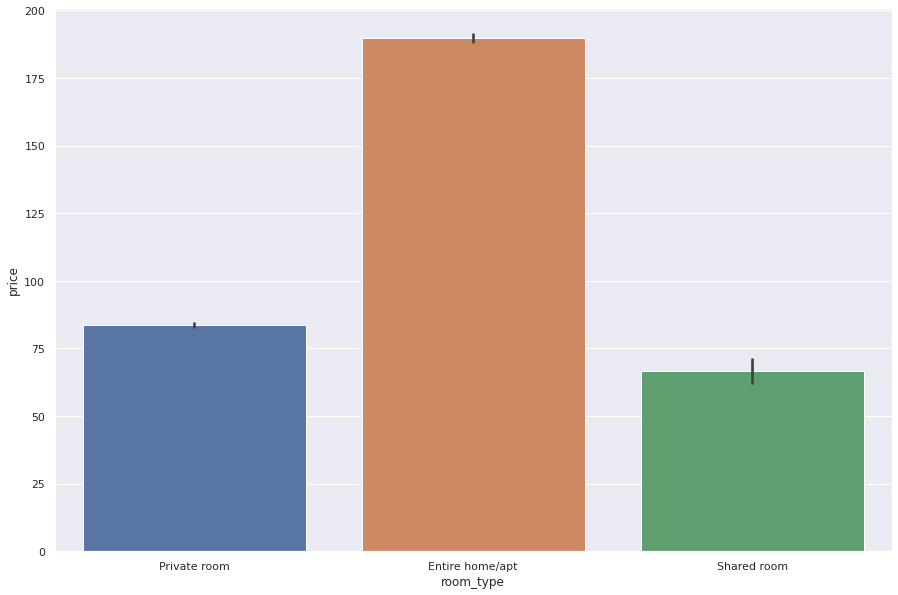

In [ ]:
sns.barplot(data['room_type'] , data['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


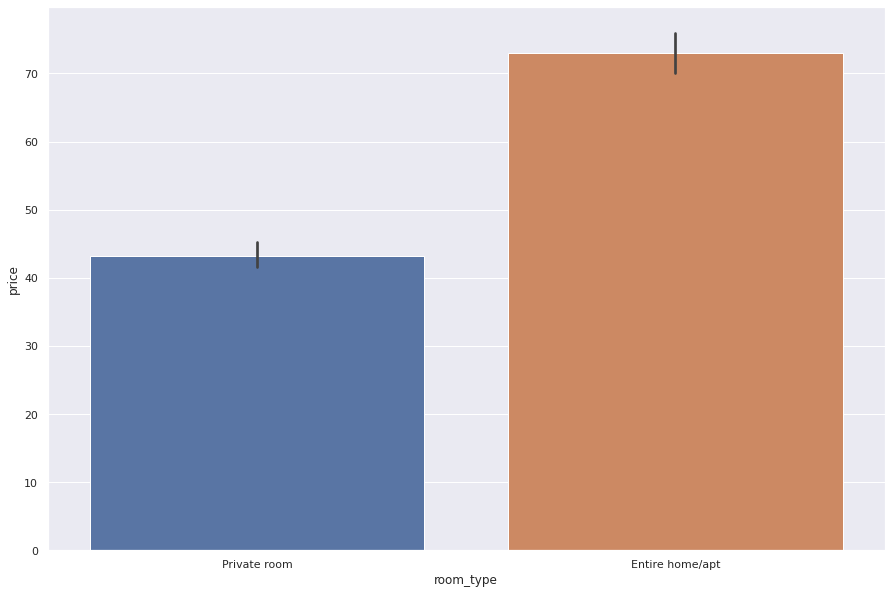

In [ ]:
sns.barplot(host1['room_type'] , host1['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


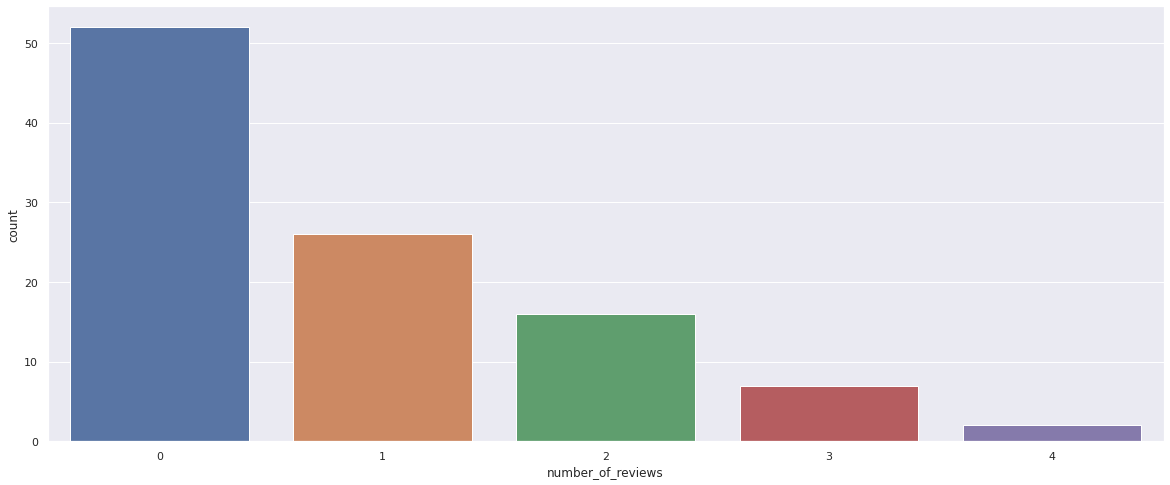

In [ ]:
plt.figure(figsize=(20,8))

sns.countplot(host1['number_of_reviews'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


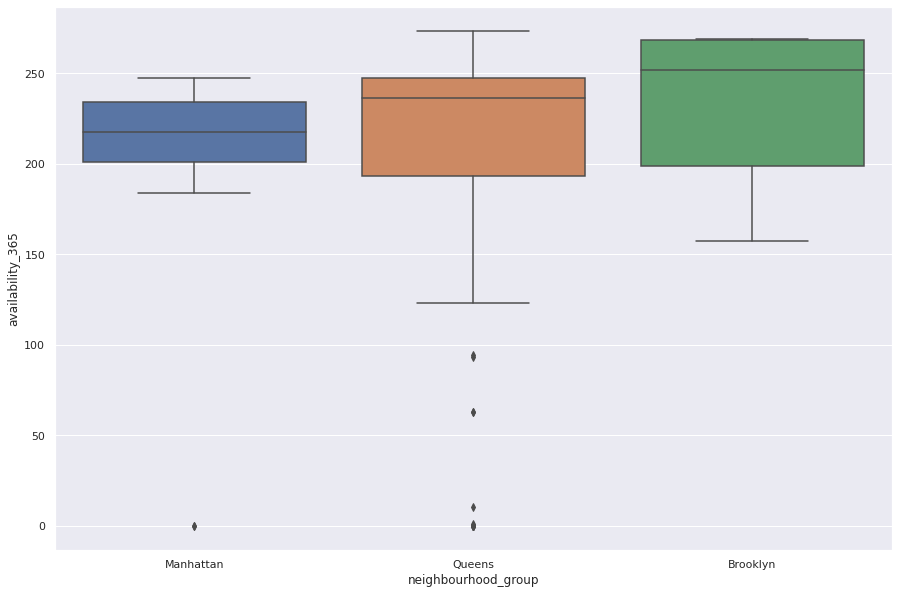

In [ ]:
sns.boxplot(host1['neighbourhood_group'] , host1['availability_365'])

# **Model**

## **CNN**

In [ ]:
data

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.2100,6,365,5.003946
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.3800,2,355,5.416100
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.1804,1,365,5.010635
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1000,1,0,4.382027
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.5900,1,129,5.298317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.1804,2,9,4.248495
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.1804,2,36,3.688879
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.1804,1,27,4.744932
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.1804,6,2,4.007333


In [ ]:
data = data.drop(columns=['price_log','last_review' , 'longitude','latitude','neighbourhood', 'host_id'])
data

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,9,0.2100,6,365
1,Manhattan,Entire home/apt,225,1,45,0.3800,2,355
2,Manhattan,Private room,150,3,0,1.1804,1,365
4,Manhattan,Entire home/apt,80,10,9,0.1000,1,0
5,Manhattan,Entire home/apt,200,3,74,0.5900,1,129
...,...,...,...,...,...,...,...,...
48890,Brooklyn,Private room,70,2,0,1.1804,2,9
48891,Brooklyn,Private room,40,4,0,1.1804,2,36
48892,Manhattan,Entire home/apt,115,10,0,1.1804,1,27
48893,Manhattan,Shared room,55,1,0,1.1804,6,2


In [ ]:
nulls = data.isnull().sum()
nulls[nulls>0]

Series([], dtype: int64)

In [ ]:
categorical_columns = []
for cols in data.columns:
    if data[cols].dtype == 'object' or data[cols].dtype == 'bool':
        categorical_columns.append(cols)
        
categorical_columns

['neighbourhood_group', 'room_type']

In [ ]:
temp = pd.get_dummies(data[categorical_columns])
data = pd.concat([data, temp], axis=1)
data = data.drop(columns = categorical_columns)
data

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,9,0.2100,6,365,0,1,0,0,0,0,1,0
1,225,1,45,0.3800,2,355,0,0,1,0,0,1,0,0
2,150,3,0,1.1804,1,365,0,0,1,0,0,0,1,0
4,80,10,9,0.1000,1,0,0,0,1,0,0,1,0,0
5,200,3,74,0.5900,1,129,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,70,2,0,1.1804,2,9,0,1,0,0,0,0,1,0
48891,40,4,0,1.1804,2,36,0,1,0,0,0,0,1,0
48892,115,10,0,1.1804,1,27,0,0,1,0,0,1,0,0
48893,55,1,0,1.1804,6,2,0,0,1,0,0,0,0,1


In [ ]:
X = data.drop(columns=['price'])
y = pd.DataFrame(data['price'])
X

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,1,9,0.2100,6,365,0,1,0,0,0,0,1,0
1,1,45,0.3800,2,355,0,0,1,0,0,1,0,0
2,3,0,1.1804,1,365,0,0,1,0,0,0,1,0
4,10,9,0.1000,1,0,0,0,1,0,0,1,0,0
5,3,74,0.5900,1,129,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,2,0,1.1804,2,9,0,1,0,0,0,0,1,0
48891,4,0,1.1804,2,36,0,1,0,0,0,0,1,0
48892,10,0,1.1804,1,27,0,0,1,0,0,1,0,0
48893,1,0,1.1804,6,2,0,0,1,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

In [ ]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.utils import plot_model
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(13,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

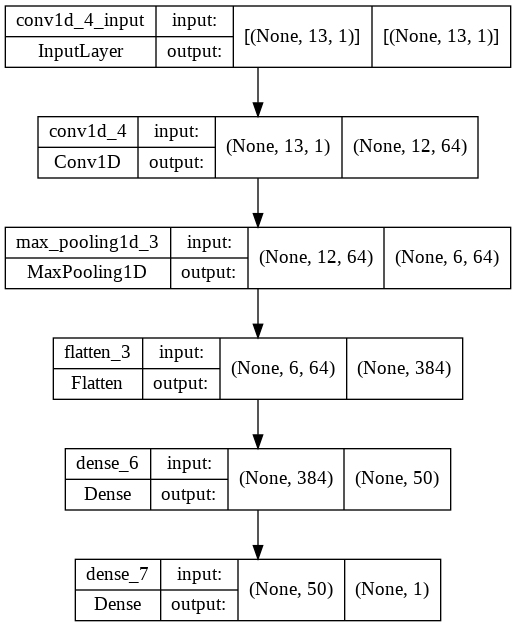

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
history = model.fit(X, y, epochs=200, verbose=1, batch_size = 32 ,validation_split=0.2)

Epoch 1/200
1144/1144 [==============================] - 5s 4ms/step - loss: 0.6297 - val_loss: 0.7526
Epoch 2/200
1144/1144 [==============================] - 3s 3ms/step - loss: 0.6116 - val_loss: 0.7714
Epoch 3/200
1144/1144 [==============================] - 3s 3ms/step - loss: 0.6070 - val_loss: 0.7619
Epoch 4/200
1144/1144 [==============================] - 3s 3ms/step - loss: 0.6006 - val_loss: 0.7876
Epoch 5/200
1144/1144 [==============================] - 3s 3ms/step - loss: 0.5972 - val_loss: 0.7830
Epoch 6/200
1144/1144 [==============================] - 3s 3ms/step - loss: 0.5952 - val_loss: 0.7660
Epoch 7/200
1144/1144 [==============================] - 3s 3ms/step - loss: 0.5921 - val_loss: 0.8103
Epoch 8/200
1144/1144 [==============================] - 3s 2ms/step - loss: 0.5902 - val_loss: 0.7881
Epoch 9/200
1144/1144 [==============================] - 3s 3ms/step - loss: 0.5886 - val_loss: 0.8020
Epoch 10/200
1144/1144 [==============================] - 3s 3ms/step - l

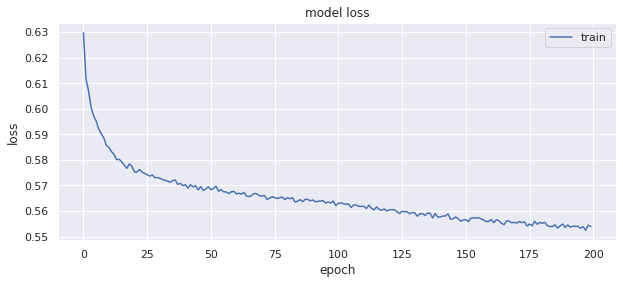

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

## **RNN**

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (13, 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

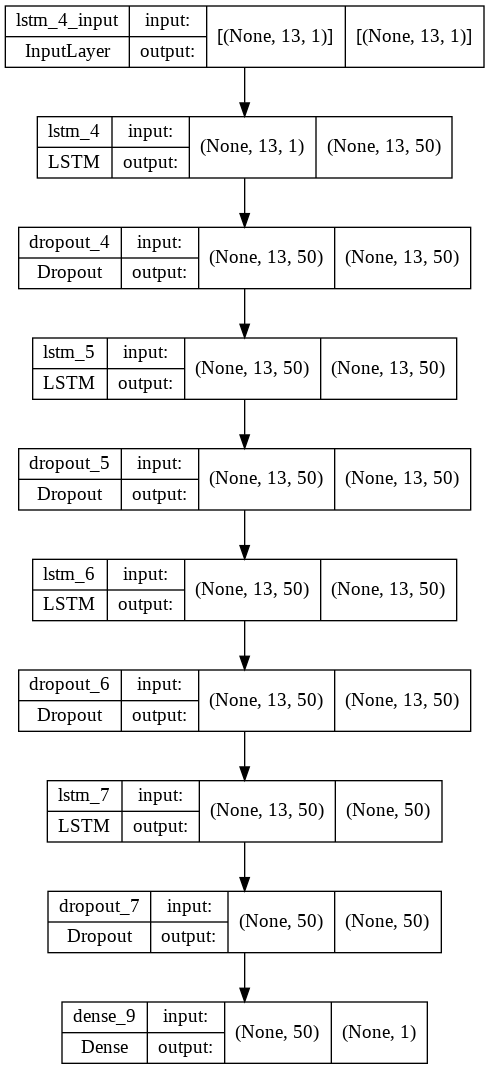

In [ ]:
plot_model(regressor, show_shapes=True)

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',mode = 'auto',verbose=1,patience=8)
history = regressor.fit(X , y , epochs = 100, batch_size = 32 ,validation_split=0.2 , callbacks=[es])

Epoch 1/100
1144/1144 [==============================] - 48s 36ms/step - loss: 0.7224 - val_loss: 0.7857
Epoch 2/100
1144/1144 [==============================] - 39s 34ms/step - loss: 0.6471 - val_loss: 0.8028
Epoch 3/100
1144/1144 [==============================] - 39s 34ms/step - loss: 0.6389 - val_loss: 0.7698
Epoch 4/100
1144/1144 [==============================] - 39s 35ms/step - loss: 0.6336 - val_loss: 0.7638
Epoch 5/100
1144/1144 [==============================] - 38s 33ms/step - loss: 0.6274 - val_loss: 0.7638
Epoch 6/100
1144/1144 [==============================] - 37s 33ms/step - loss: 0.6257 - val_loss: 0.7707
Epoch 7/100
1144/1144 [==============================] - 37s 33ms/step - loss: 0.6200 - val_loss: 0.7757
Epoch 8/100
1144/1144 [==============================] - 37s 33ms/step - loss: 0.6165 - val_loss: 0.7870
Epoch 9/100
1144/1144 [==============================] - 38s 33ms/step - loss: 0.6119 - val_loss: 0.7955
Epoch 10/100
1144/1144 [==============================]

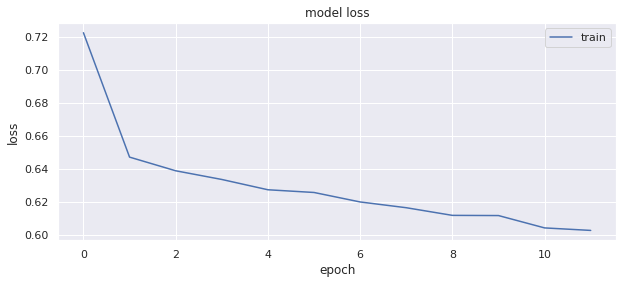

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()